### Data importation and basic characteristic check

In [256]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [257]:
df = pd.read_csv(r'C:\Users\Home\csv_files\loan_pred.txt')

<b>Data dictionary</b>:

<b>loan_amnt</b> : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.  

<b>term</b> : The number of payments on the loan. Values are in months and can be either 36 or 60.  

<b>int_rate</b> : Interest Rate on the loan  

<b>installment</b> : The monthly payment owed by the borrower if the loan originates.  

<b>grade</b> : LoanTap assigned loan grade  

<b>sub_grade</b> : LoanTap assigned loan subgrade  

<b>emp_title</b> :The job title supplied by the Borrower when applying for the loan.  

<b>emp_length</b> : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.  

<b>home_ownership</b> : The home ownership status provided by the borrower during registration or obtained from the credit report.  

<b>annual_inc</b> : The self-reported annual income provided by the borrower during registration.  

<b>verification_status</b> : Indicates if income was verified by LoanTap, not verified, or if the income source was verified  

<b>issue_d</b> : The month which the loan was funded  

<b>loan_status</b> : Current status of the loan - Target Variable  

<b>purpose</b> : A category provided by the borrower for the loan request.

<b>title</b> : The loan title provided by the borrower

<b>dti</b> : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.

<b>earliest_cr_line</b> :The month the borrower's earliest reported credit line was opened

<b>open_acc</b> : The number of open credit lines in the borrower's credit file.

<b>pub_rec</b> : Number of derogatory public records

<b>revol_bal</b> : Total credit revolving balance

<b>revol_util</b> : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

<b>total_acc</b> : The total number of credit lines currently in the borrower's credit file

<b>initial_list_status</b> : The initial listing status of the loan. Possible values are – W, F

<b>application_type</b> : Indicates whether the loan is an individual application or a joint application with two co-borrowers

<b>mort_acc</b> : Number of mortgage accounts.

<b>pub_rec_bankruptcies</b> : Number of public record bankruptcies

<b>Address: Address</b> of the individual

In [258]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [259]:
# We can see that its a pretty big dataset.
df.shape

(396030, 27)

In [260]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [261]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [262]:
df.describe(exclude=np.number).T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


In [263]:
# Null values exist in our data. Data types include float and object.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### Train-validation-test split

In [264]:
# Dividing the data set in train, vaidation and test sets with 60, 20 and 20 split.
train, validation, test = np.split(df.sample(frac=1, random_state=42), [int(.6*len(df)), int(.8*len(df))])

In [265]:
train.shape, validation.shape, test.shape

((237618, 27), (79206, 27), (79206, 27))

### EDA and Feature engineering (Insights at the end of this content)

In [266]:
# Extracting the states from the address column. 
train['states'] = train['address'].apply(lambda x : x[-8:-6])
train.drop('address', axis=1, inplace=True)

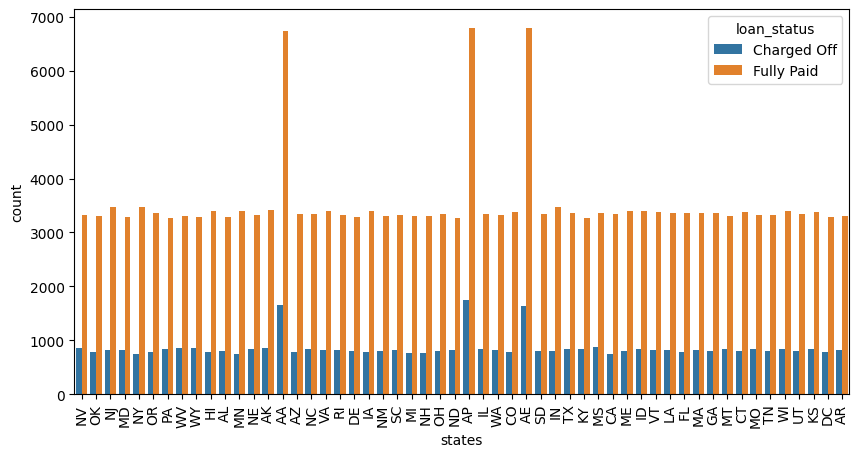

In [267]:
# We can't make anything out of this plot. 
plt.figure(figsize=(10,5))
sns.countplot(data = train, x = 'states', hue = train['loan_status'])
plt.xticks(rotation = 'vertical')
plt.show()

In [268]:
# Using Chi-square to see if the states have any impact on the target variable
# Ho = No relationship exists.
# Ha = Relationship exists.
stat, pval, dof, expected = stats.chi2_contingency(pd.crosstab(train['states'], train['loan_status']))
pval

# Considering significance level as 0.05, we fail to reject the null hypothesis. Hence, there is no relationship.

0.1992642116999992

In [269]:
# Dropping states column.
train.drop('states', axis = 1,inplace=True)
test.drop('address', axis = 1, inplace=True)
validation.drop('address', axis = 1, inplace=True)

#### Univariate analyis

In [270]:
cont_features = train.describe().columns
cont_features

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [271]:
# Deleting 'pub_rec_bankruptcies', 'mort_acc',  'pub_rec' from cont_features as they appear to be categorical
cont_features = np.delete(cont_features, [-1,-2,-6])
cont_features

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')

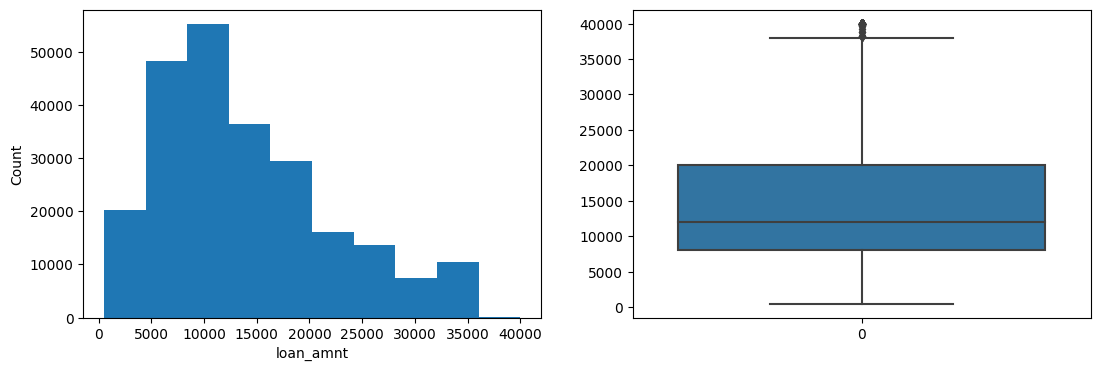

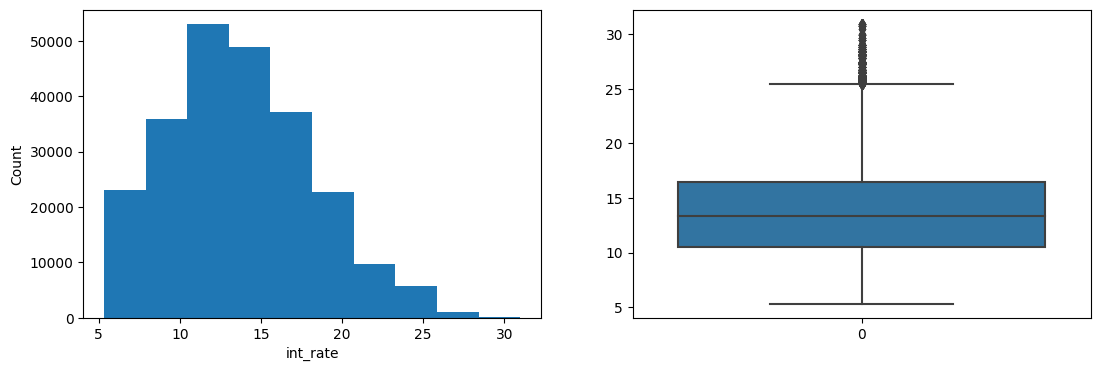

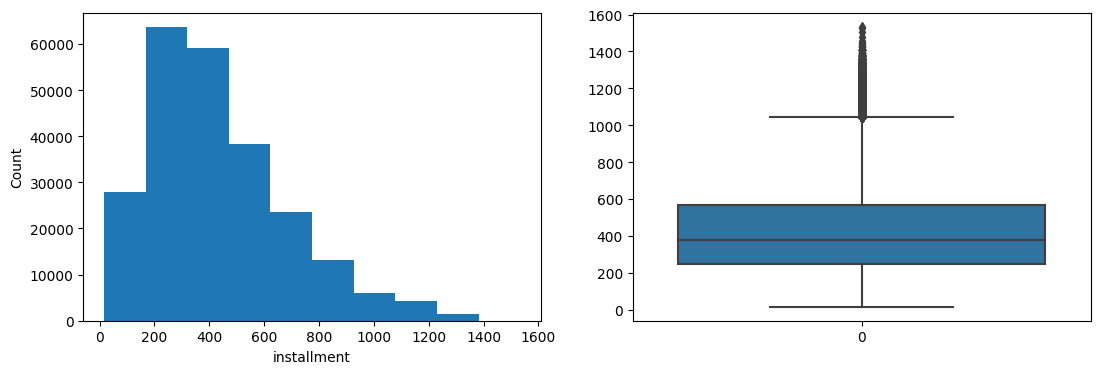

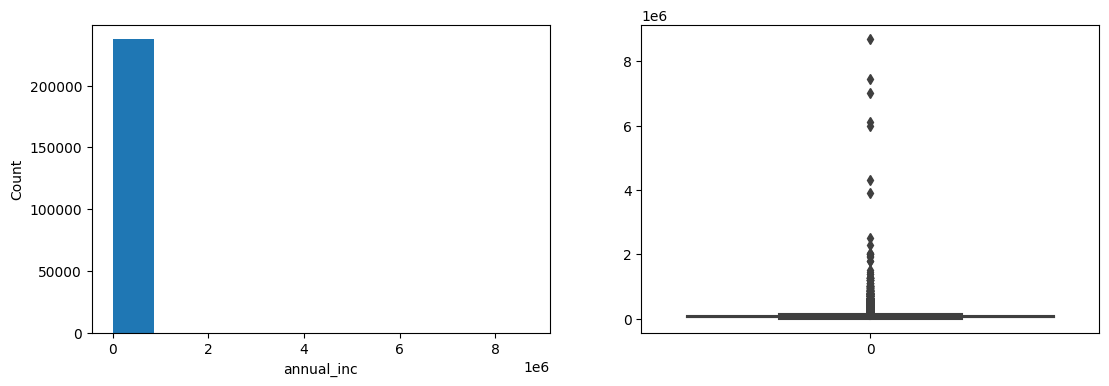

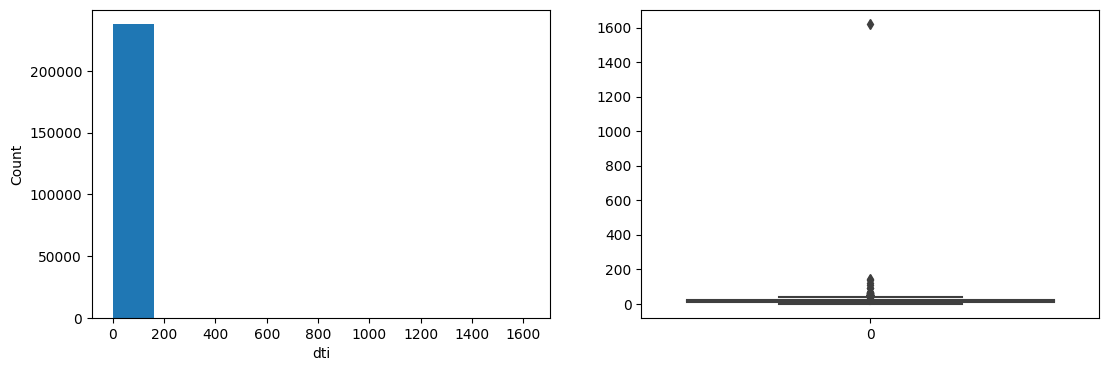

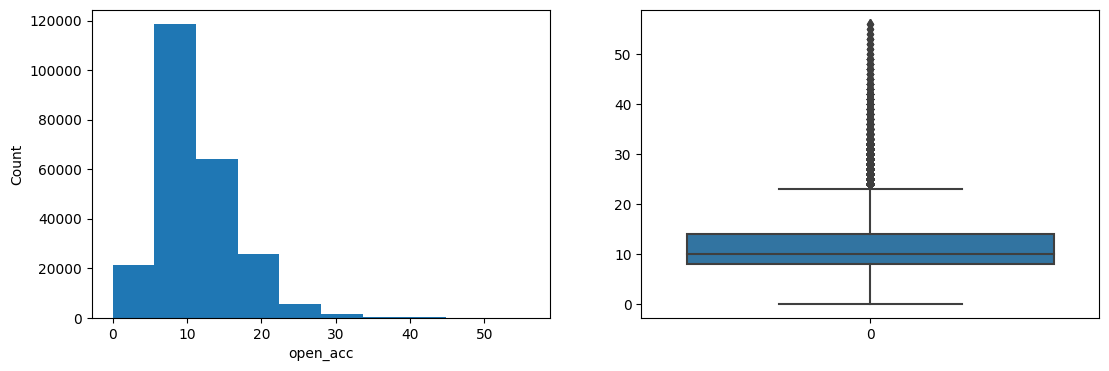

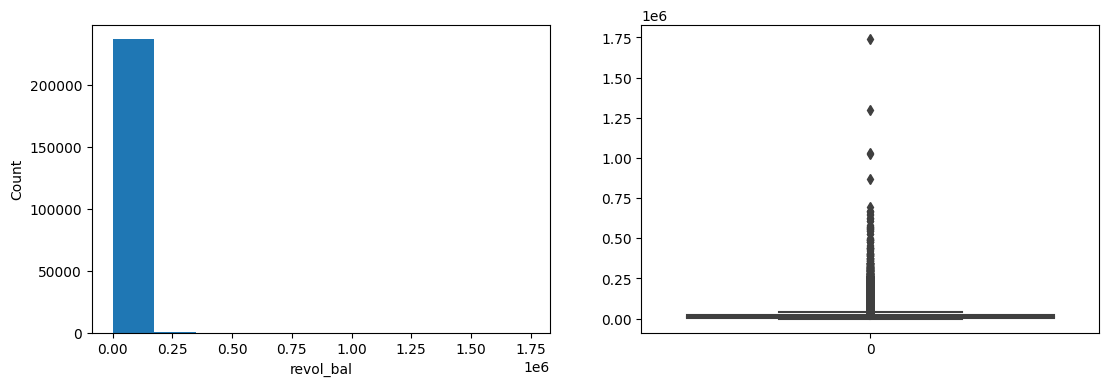

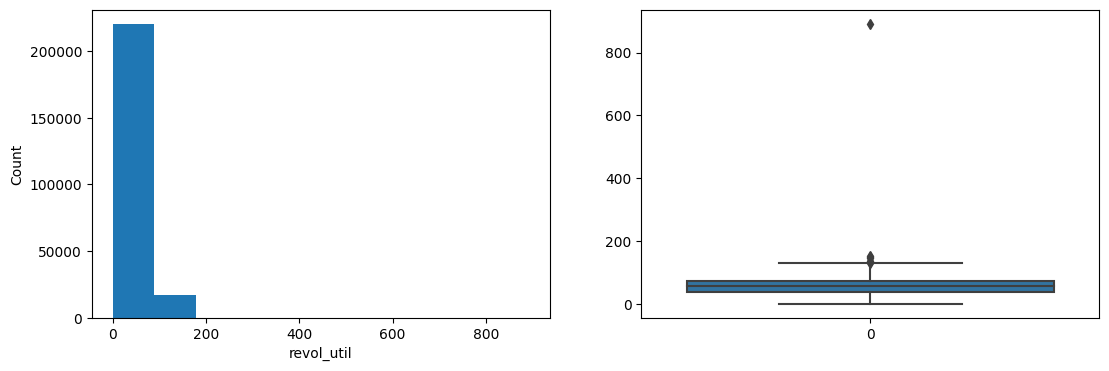

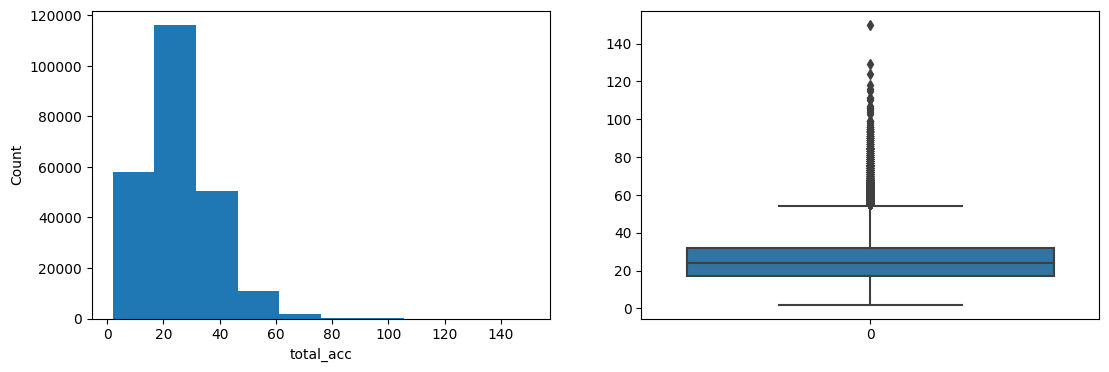

In [272]:
for cont_var in cont_features:
    plt.figure(figsize=(13,4)) 
    plt.subplot(1, 2, 1)
    plt.hist(train[cont_var], histtype = 'stepfilled')
    plt.xlabel(cont_var)
    plt.ylabel('Count')
    plt.subplot(1, 2, 2)
    sns.boxplot(train[cont_var])
plt.show()

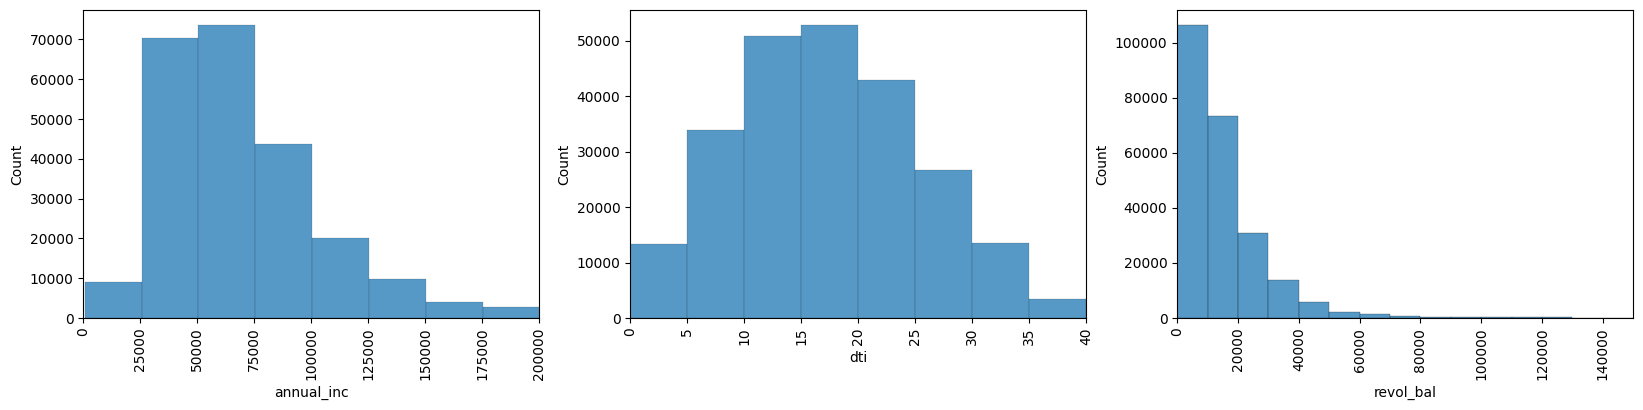

In [273]:
# Plotting for some cont_features individually again as scaling was not properly done above due to so many outliers.
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
sns.histplot(train['annual_inc'], binwidth=25000)
plt.xlim(0, 0.2*10**6)
plt.xticks(rotation='vertical')
plt.subplot(1,3,2)
sns.histplot(train['dti'], binwidth=5)
plt.xlim(0, 40)
plt.xticks(rotation='vertical')
plt.subplot(1,3,3)
sns.histplot(train['revol_bal'], binwidth=10000)
plt.xlim(0,0.15*10**6)
plt.xticks(rotation='vertical')
plt.show()

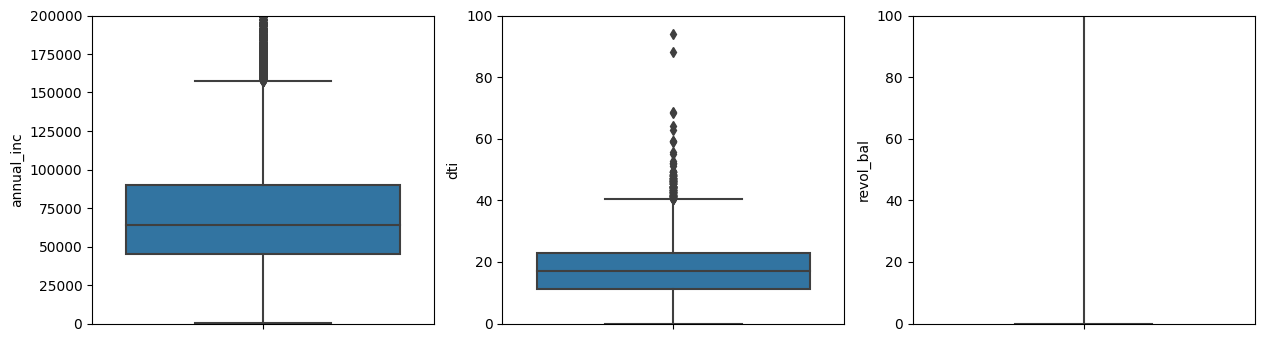

In [274]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(y = train['annual_inc'])
plt.ylim(0, 0.2*10**6)
plt.subplot(1,3,2)
sns.boxplot(y = train['dti'])
plt.ylim(0, 100)
plt.subplot(1,3,3)
sns.boxplot(y = train['revol_bal'])
plt.ylim(0, 100)
plt.show()

In [275]:
# purpose and title features appear to be same. Hence, dropping title feature
train.drop('title',axis = 1, inplace=True)
validation.drop('title',axis = 1, inplace=True)
test.drop('title',axis = 1, inplace=True)

In [276]:
cat_features = np.array(train.describe(exclude=np.number).columns)
cat_features

array(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type'], dtype=object)

In [277]:
# Removing date_time and 'emp_title' features. 
cat_features = np.delete(cat_features, [3,7,10])

In [278]:
# Adding 'pub_rec_bankruptcies', 'mort_acc',  'pub_rec' to cat_features as they appear to be categorical
cat_features = np.append(cat_features, ['pub_rec', 'mort_acc', 'pub_rec_bankruptcies'])
cat_features

array(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose',
       'initial_list_status', 'application_type', 'pub_rec', 'mort_acc',
       'pub_rec_bankruptcies'], dtype=object)

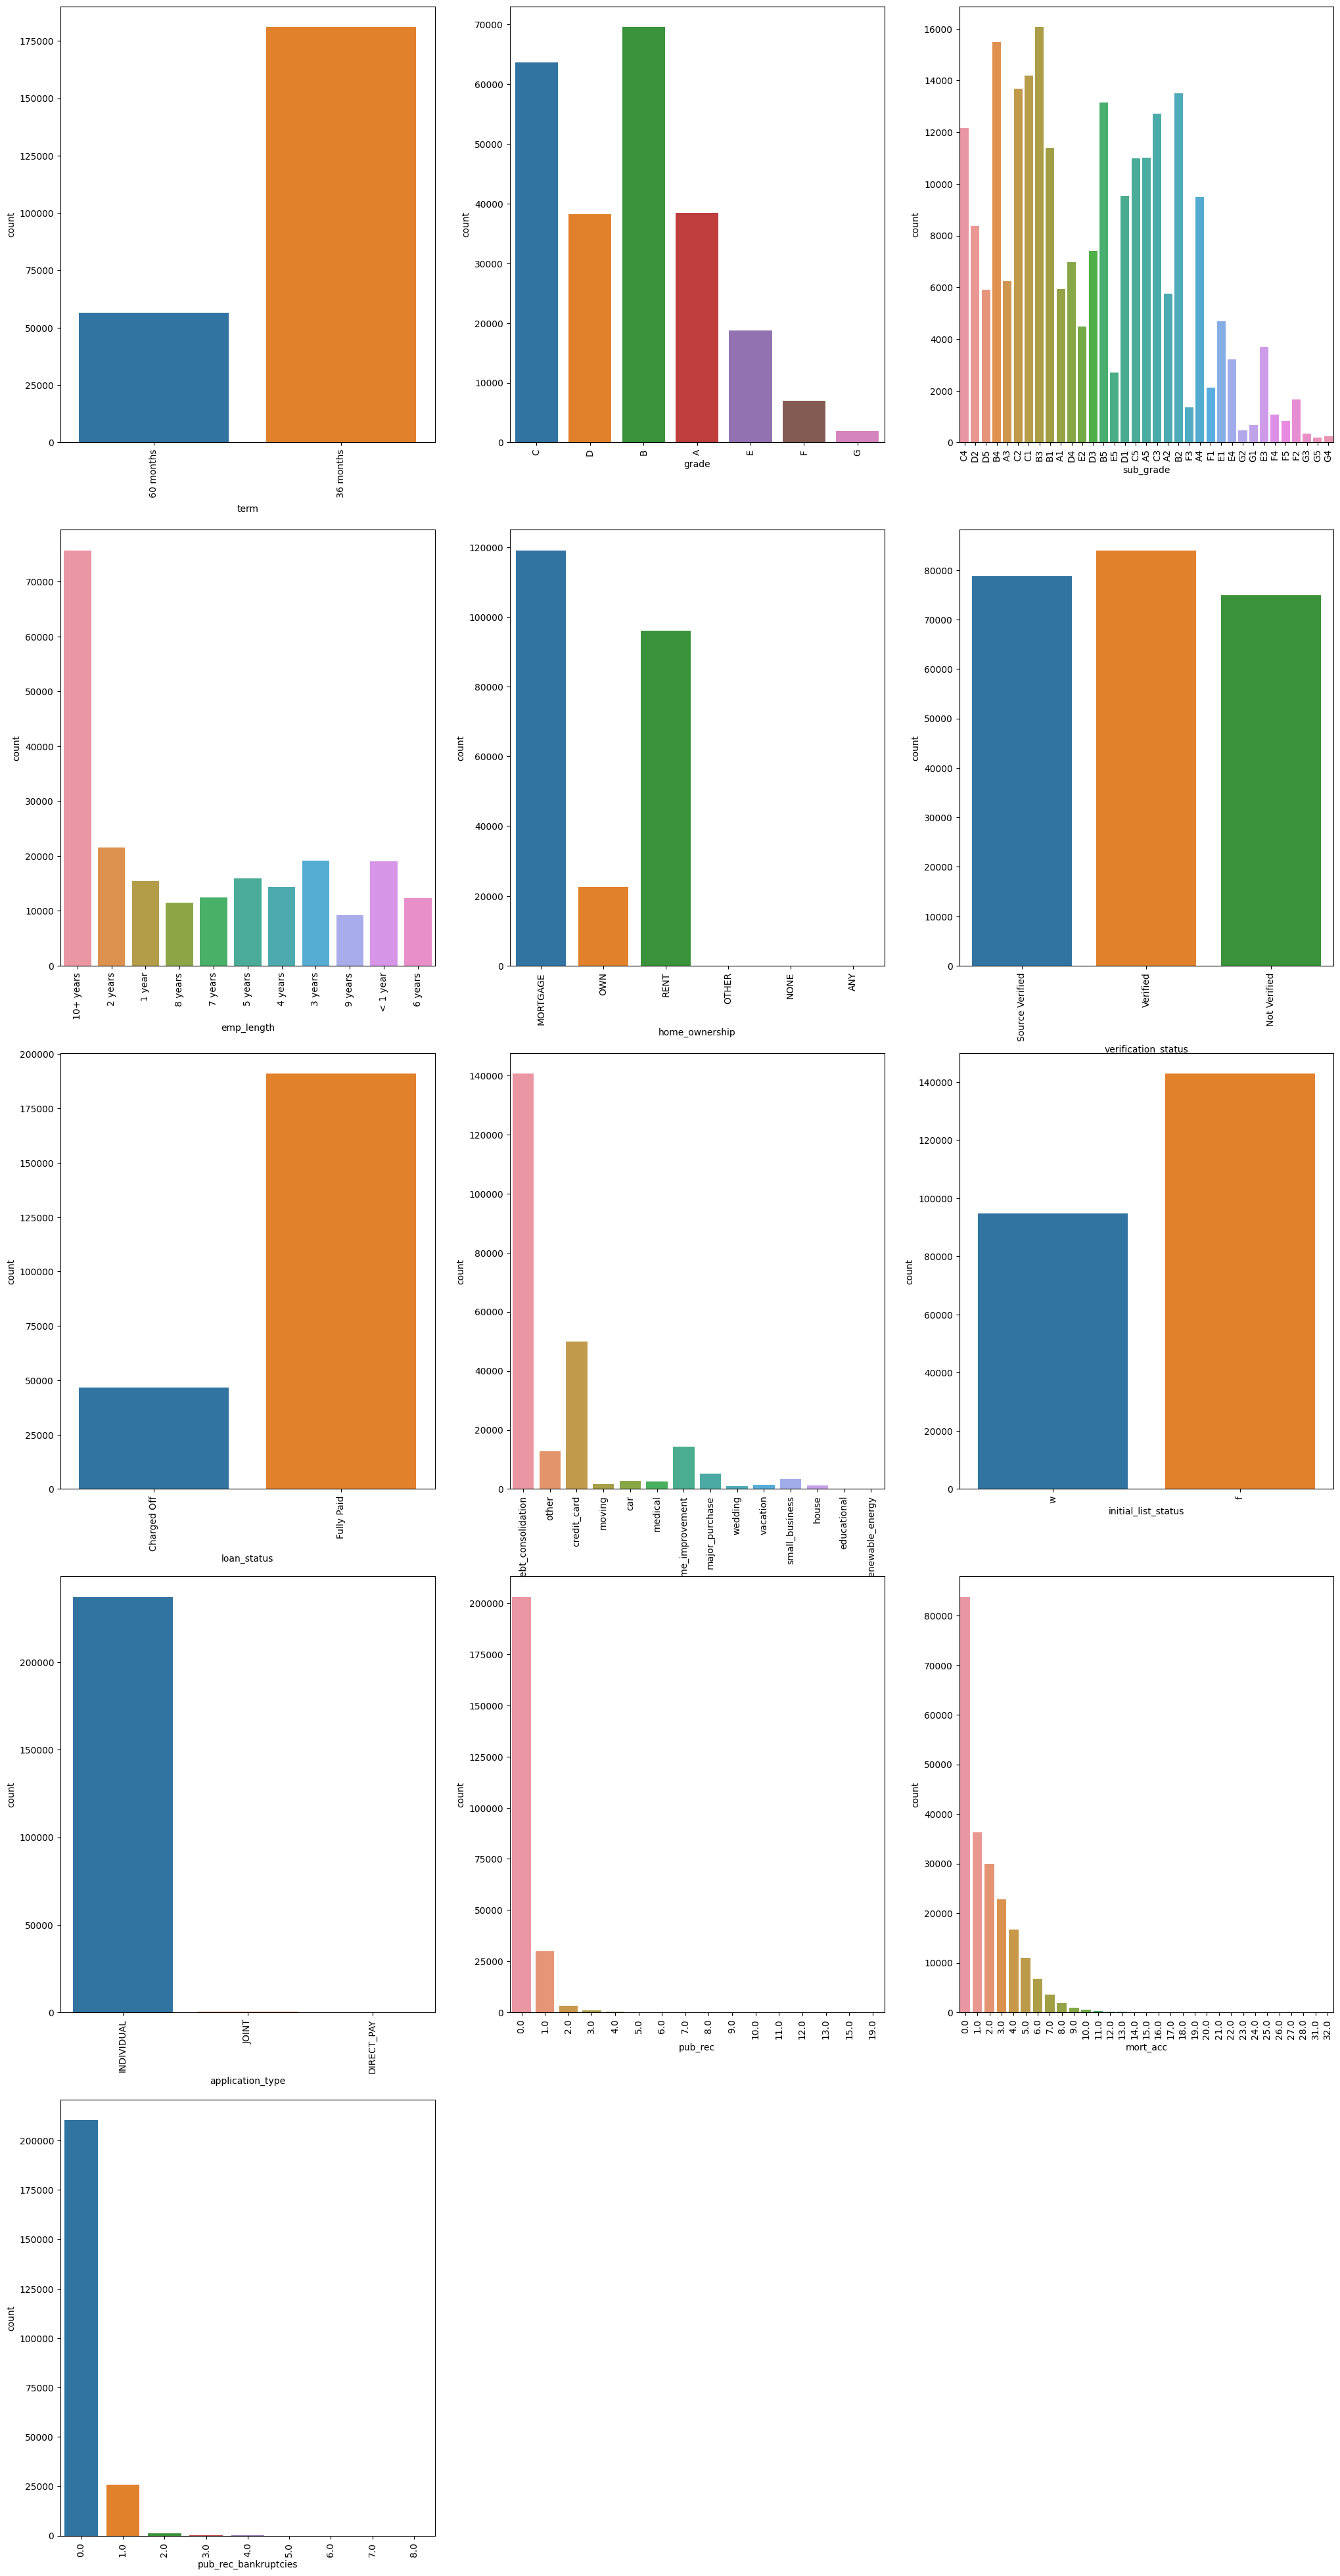

In [279]:
i = 1
plt.figure(figsize=(25,50))
for cat_var in cat_features:
    plt.subplot(5,3,i)
    sns.countplot(train, x = train[cat_var])
    plt.xticks(rotation='vertical')
    i += 1
plt.show()

In [280]:
# Lets now convert issue_d and earliest_cr_line features to date_time dtype
for vals in [train, test, validation]:    
    vals['issue_d'] = pd.to_datetime(vals['issue_d'])
    vals['earliest_cr_line'] = pd.to_datetime(vals['earliest_cr_line'])

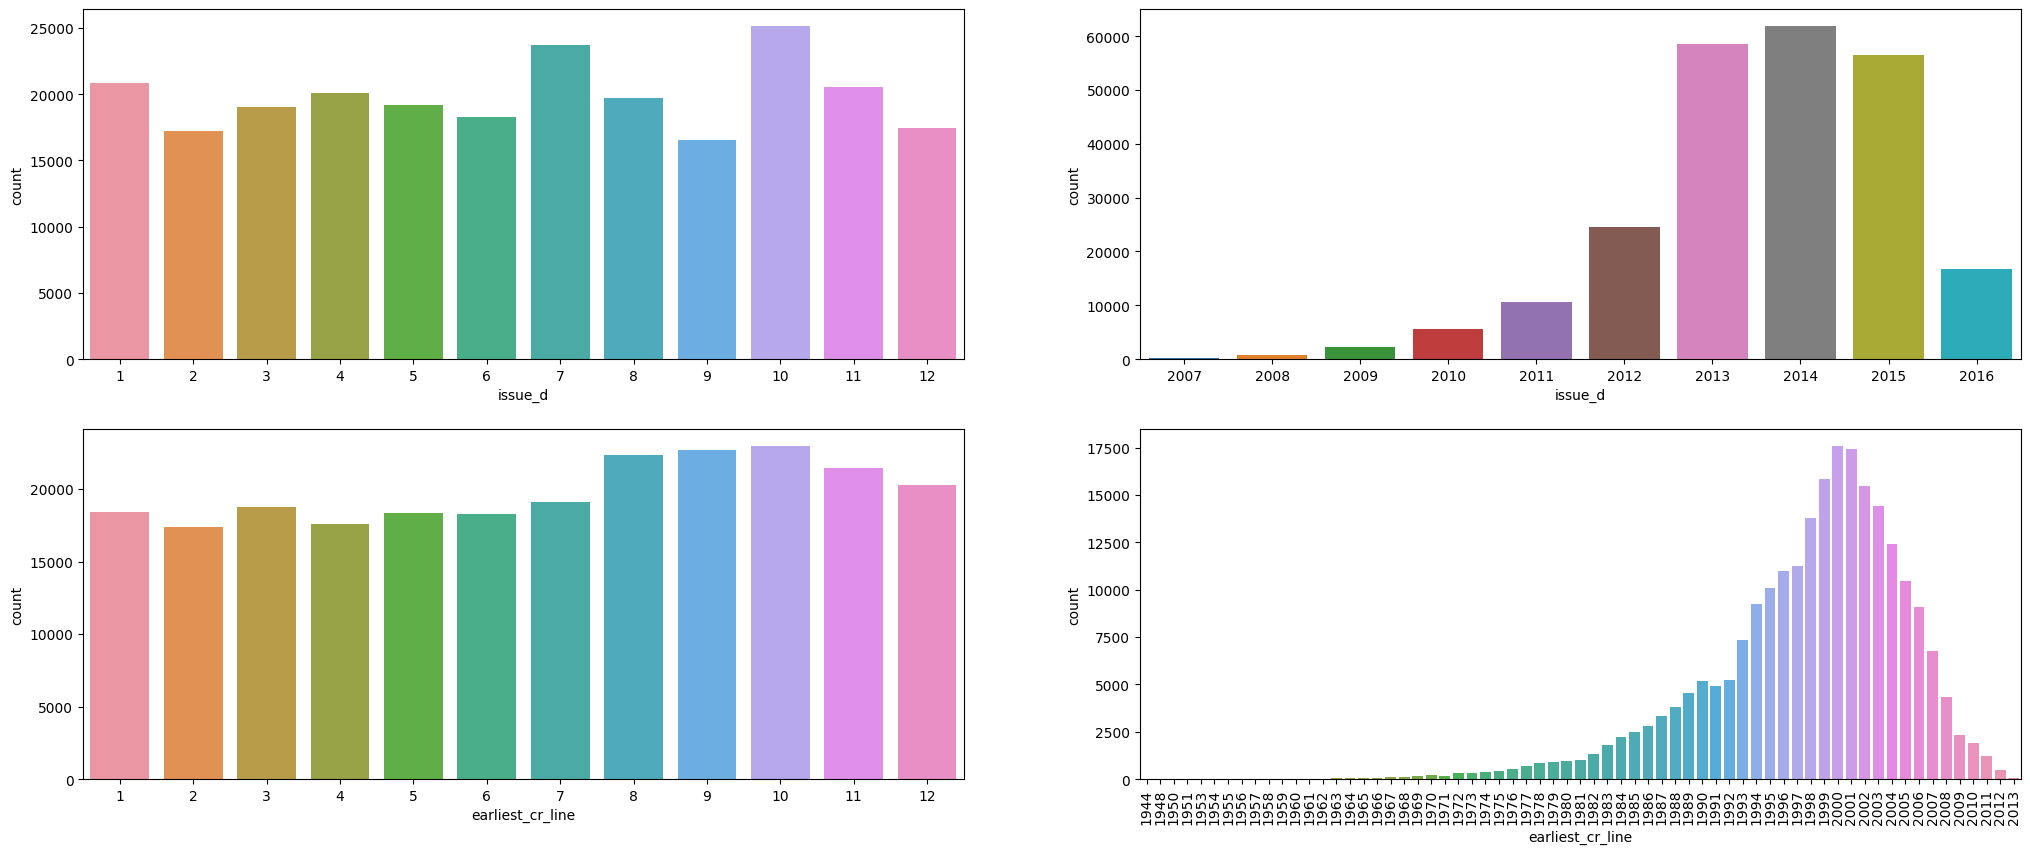

In [281]:
plt.figure(figsize=(25,10)) 
plt.subplot(221)
sns.countplot(train, x=train['issue_d'].dt.month)
plt.subplot(222)
sns.countplot(train, x=train['issue_d'].dt.year)
plt.subplot(223)
sns.countplot(train, x=train['earliest_cr_line'].dt.month)
plt.subplot(224)
sns.countplot(train, x=train['earliest_cr_line'].dt.year)
plt.xticks(rotation='vertical')
plt.show()

In [282]:
# Since emp_title' feature has a lot of categories, i'll just go with the top value_counts instead of plotting.
train['emp_title'].value_counts()[:10]

Teacher             2627
Manager             2564
Registered Nurse    1118
Supervisor          1109
RN                  1107
Sales                948
Project Manager      916
Owner                818
Driver               791
Office Manager       724
Name: emp_title, dtype: int64

#### Multivariate analyis (predictors vs target variable)

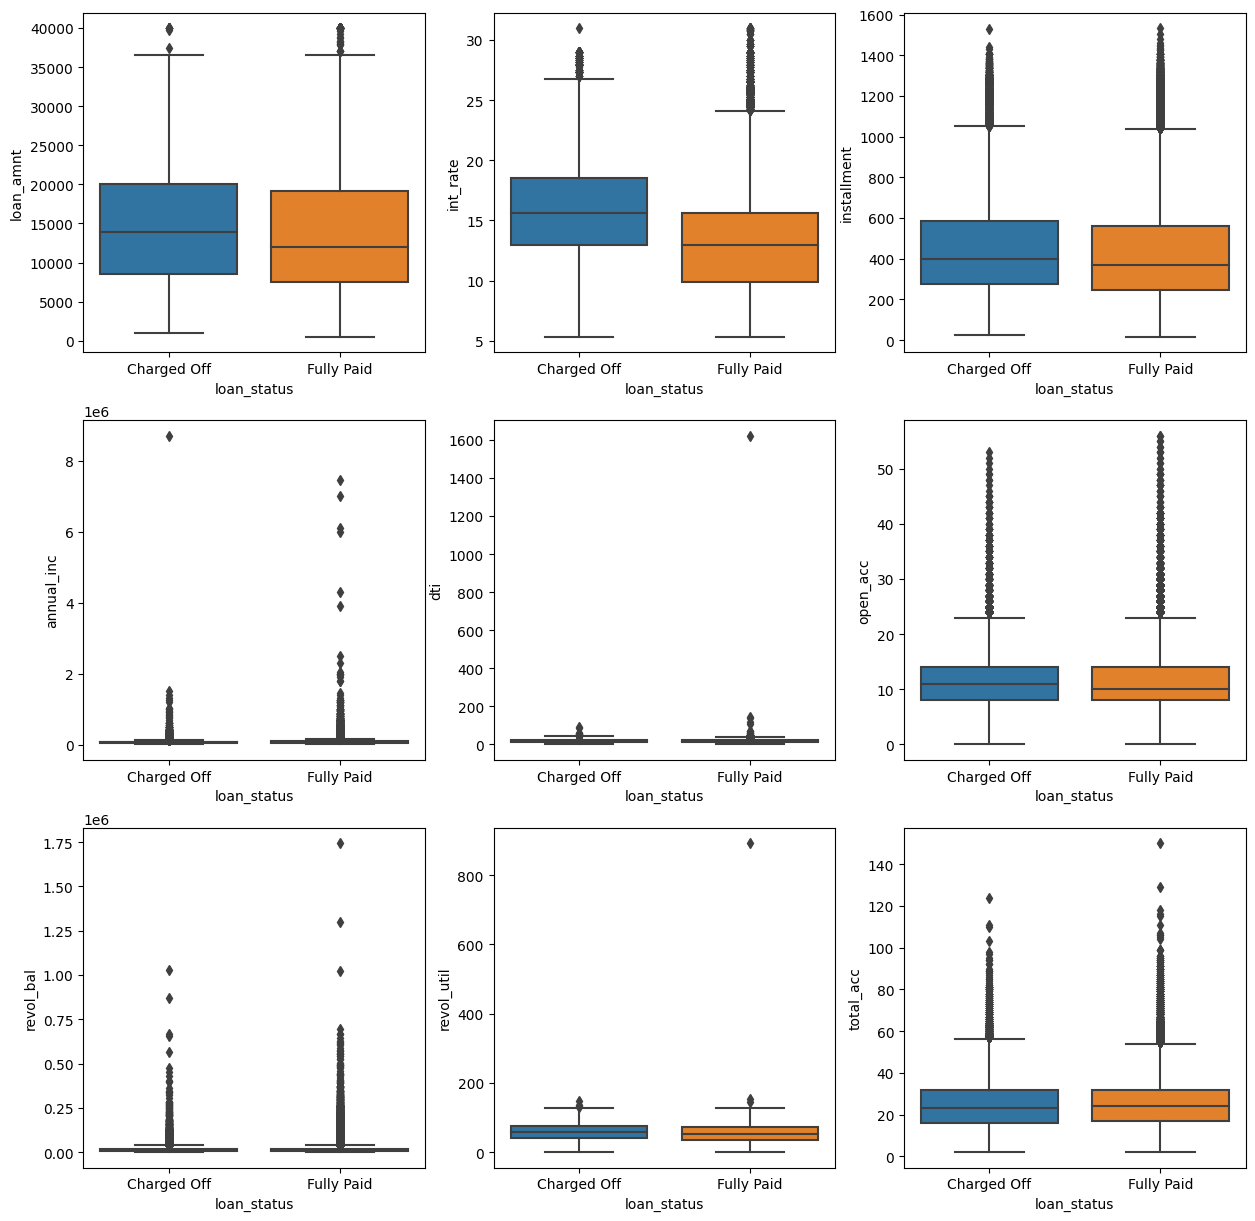

In [283]:
i = 1
plt.figure(figsize=(15,15))
for cols in cont_features:
    plt.subplot(3,3,i)
    sns.boxplot(y=train[cols], x = train['loan_status'])
    i += 1
plt.show()

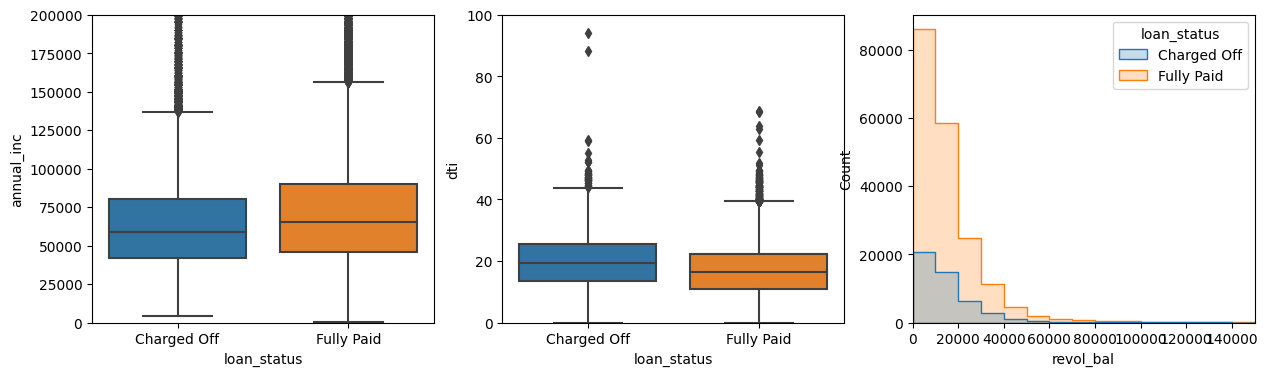

In [284]:
# Plotting for some cont_features individually again as scaling was not properly done above due to so many outliers.
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(y=train['annual_inc'], x = train['loan_status'])
plt.ylim(0, 0.2*10**6)
plt.subplot(1,3,2)
sns.boxplot(y=train['dti'], x = train['loan_status'])
plt.ylim(0, 100)
plt.subplot(1,3,3)
sns.histplot(x = train['revol_bal'], binwidth=10000, hue = train['loan_status'], element="step")
plt.xlim(0,0.15*10**6)
plt.show()

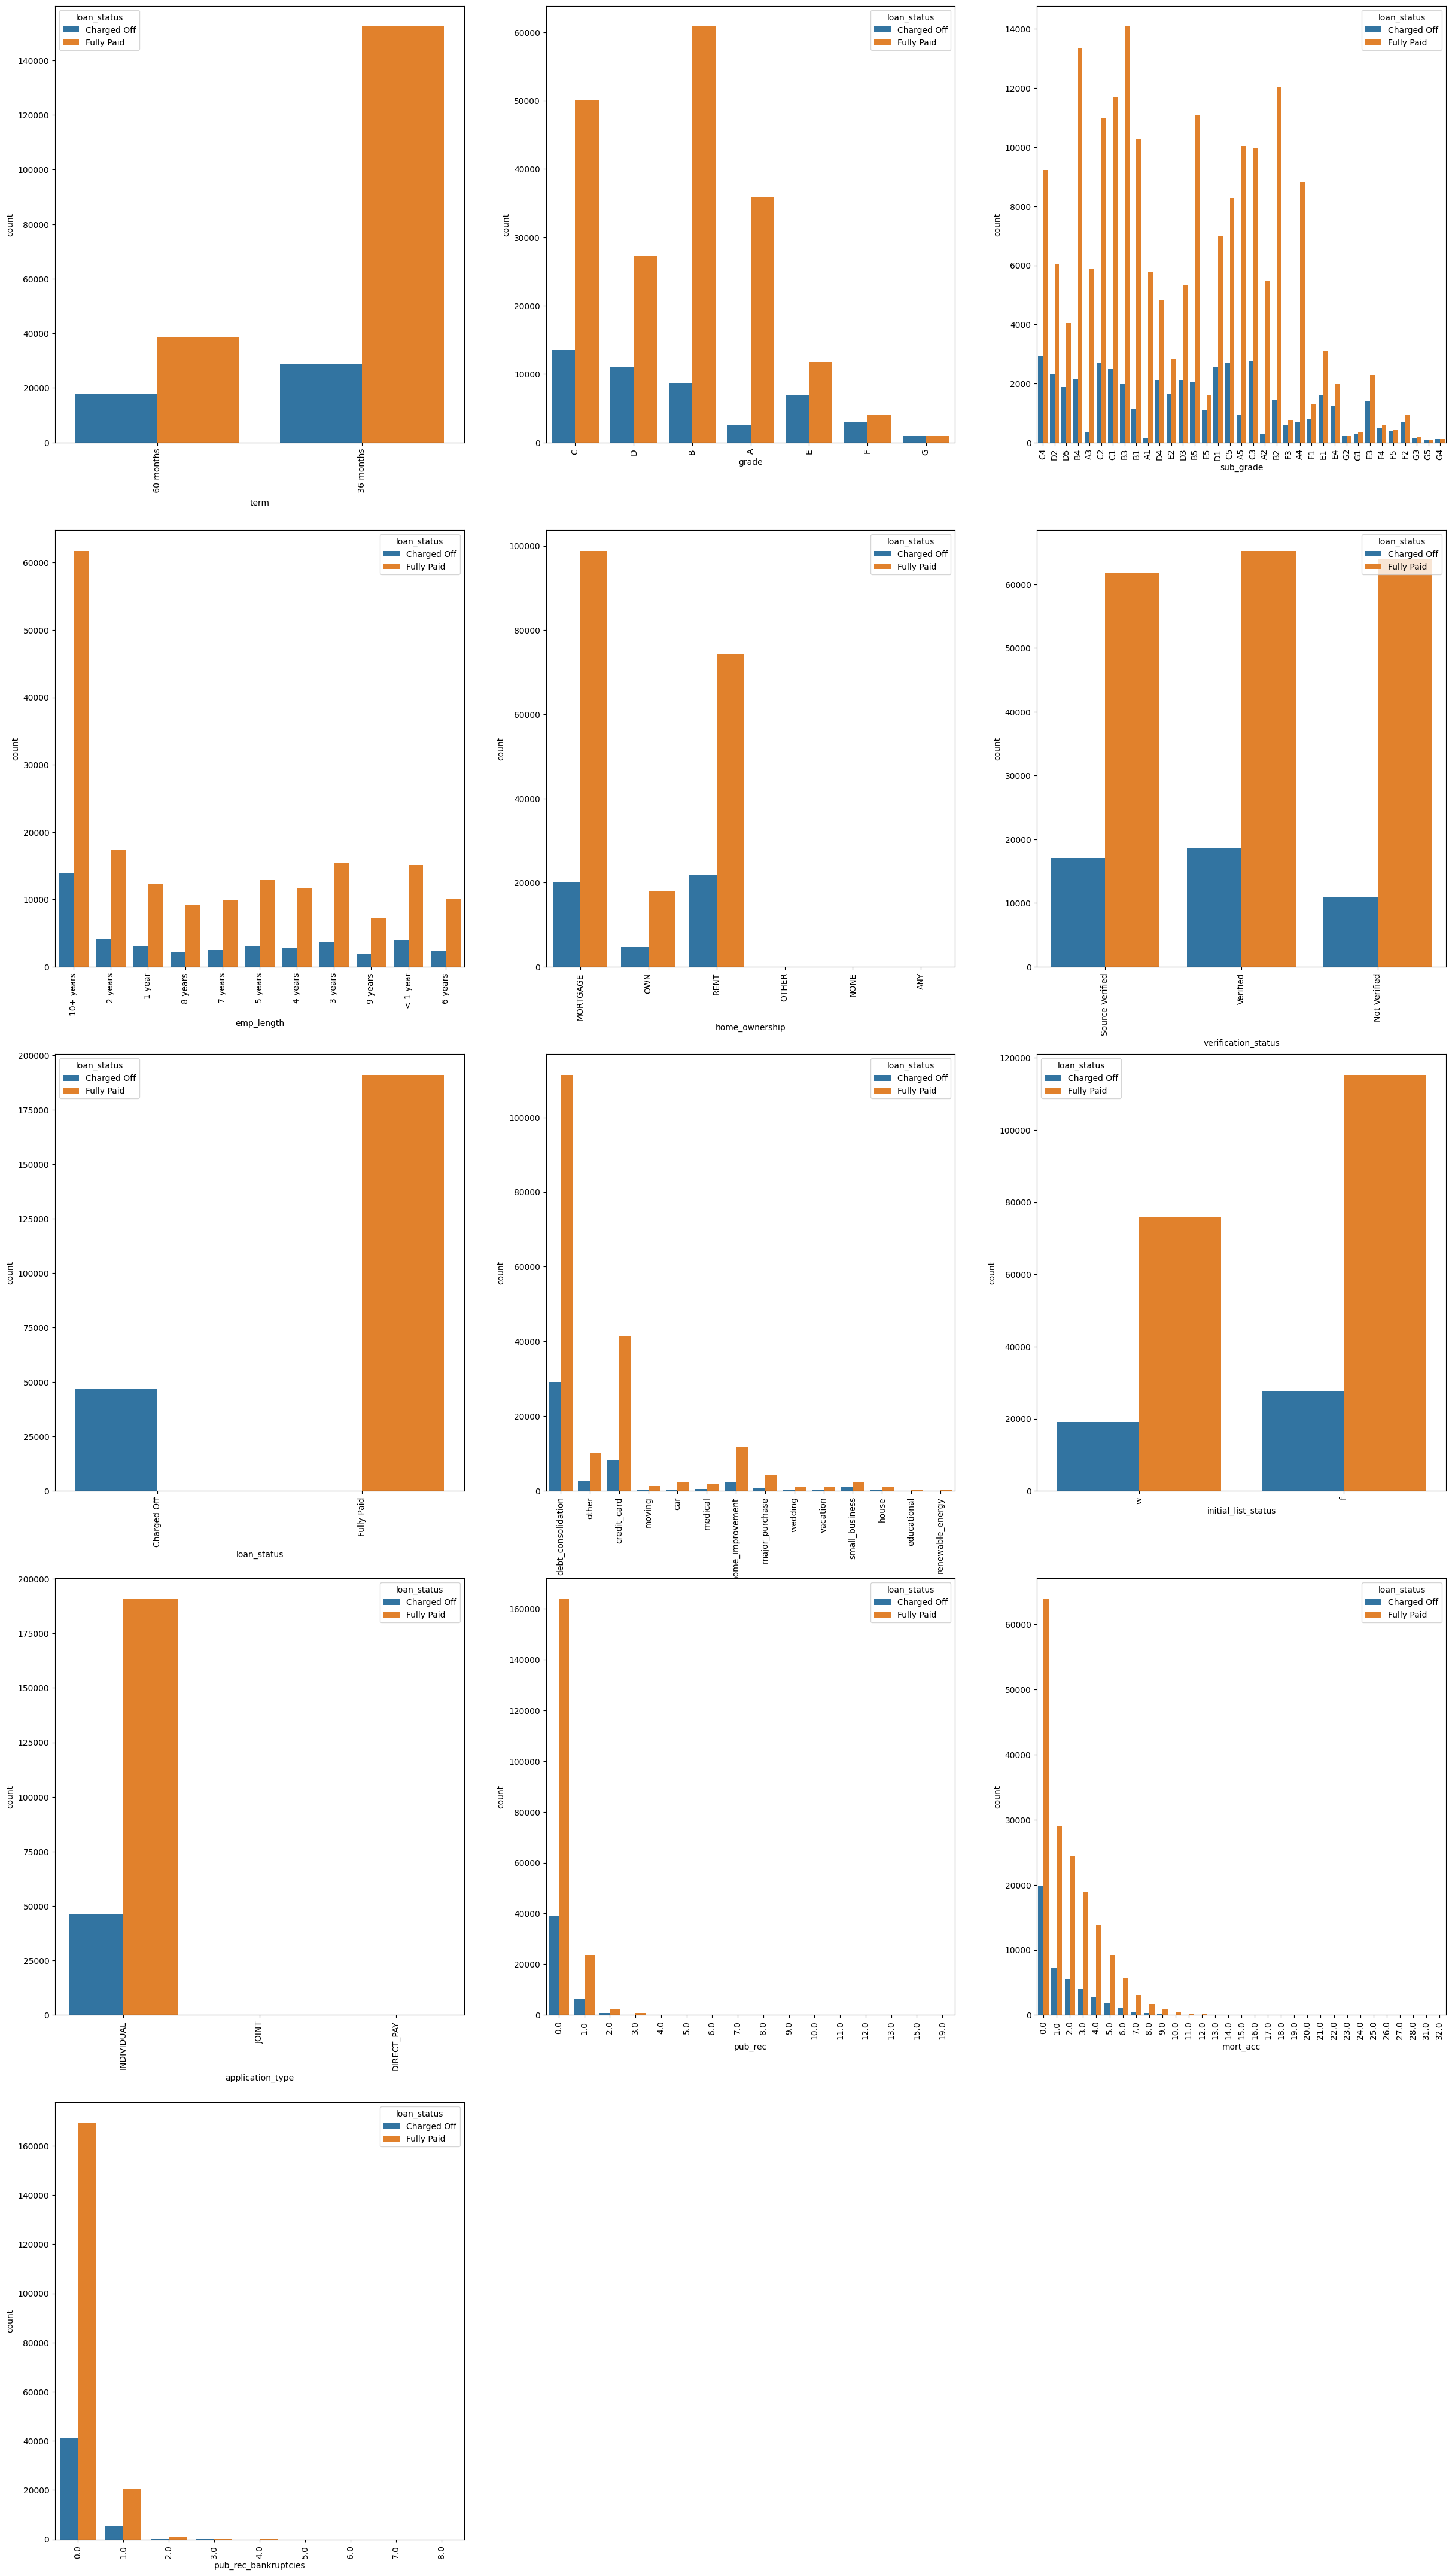

In [285]:
plt.figure(figsize=(30,55))
for cat_var in enumerate(cat_features):
    plt.subplot(5,3,cat_var[0]+1)
    sns.countplot(train, x = train[cat_var[1]], hue = train['loan_status'])
    plt.xticks(rotation='vertical')
plt.show()

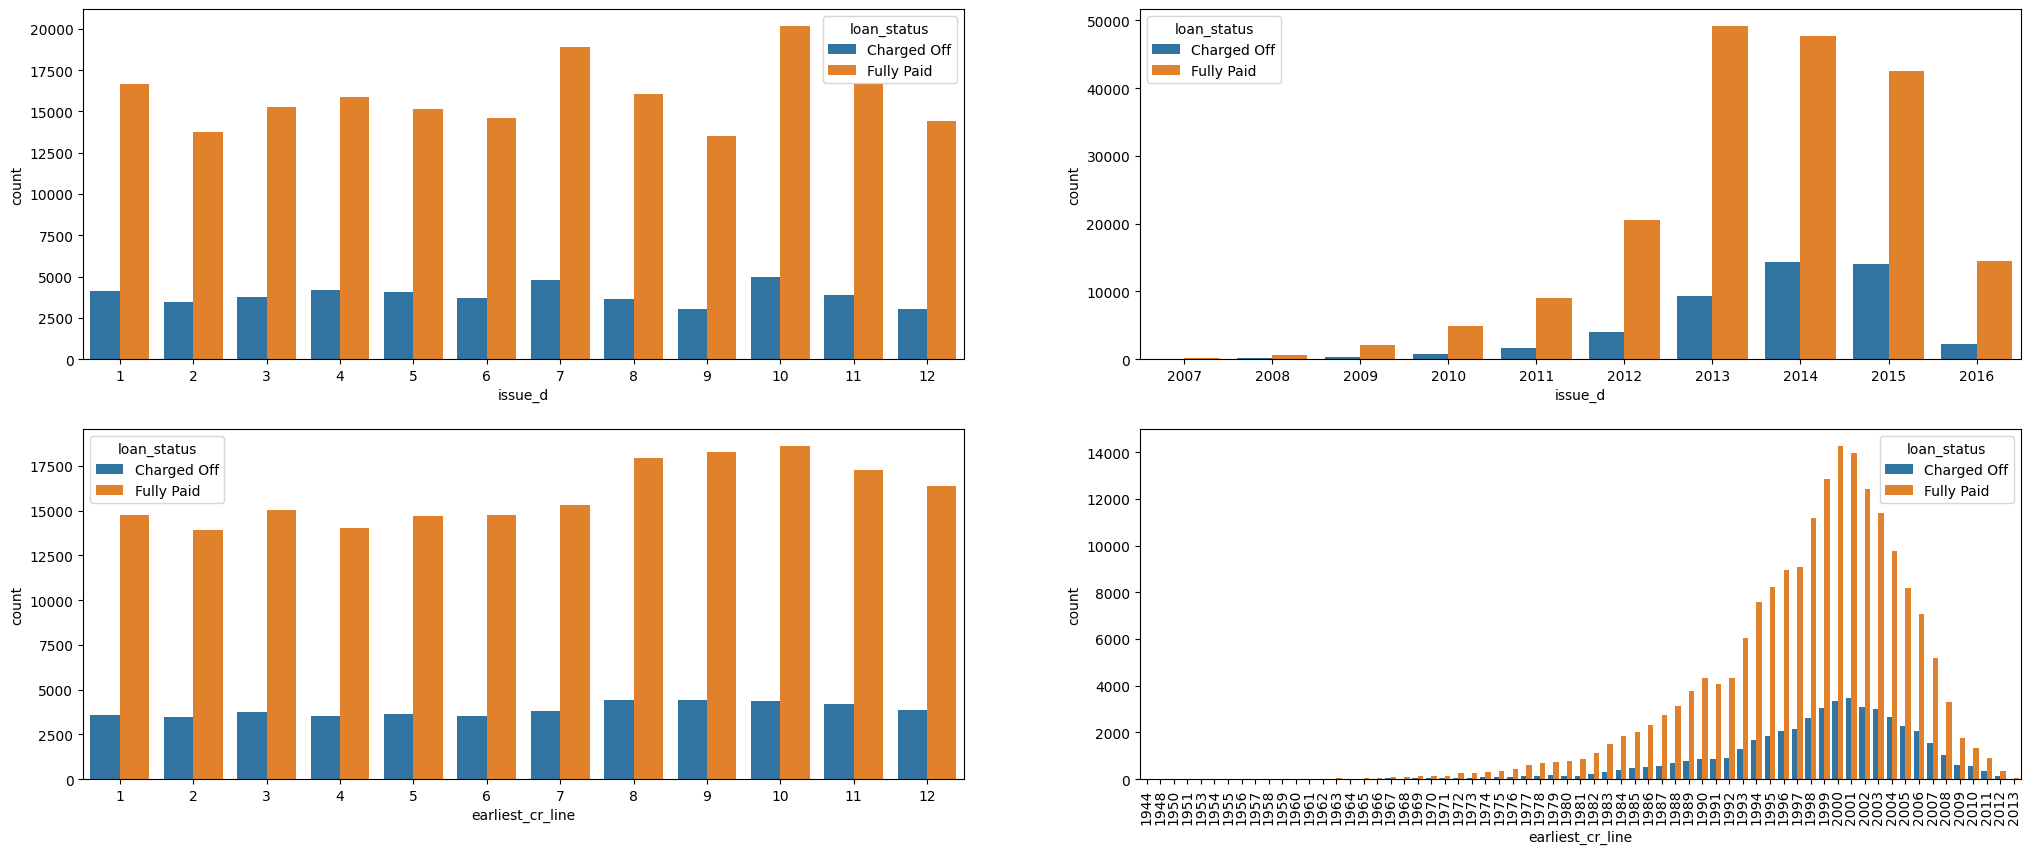

In [286]:
plt.figure(figsize=(25,10)) 
plt.subplot(221)
sns.countplot(x = train['issue_d'].dt.month, hue = train['loan_status'])
plt.subplot(222)
sns.countplot(x = train['issue_d'].dt.year, hue = train['loan_status'])
plt.subplot(223)
sns.countplot(x = train['earliest_cr_line'].dt.month, hue = train['loan_status'])
plt.subplot(224)
sns.countplot(x = train['earliest_cr_line'].dt.year, hue = train['loan_status'])
plt.xticks(rotation='vertical')
plt.show()

In [287]:
# Since emp_title' feature has a lot of categories, i'll just go with the top value_counts() instead of plotting.
print(train[train['loan_status'] == 'Charged Off']['emp_title'].value_counts()[:5], 
train[train['loan_status'] == 'Fully Paid']['emp_title'].value_counts()[:5])

Manager             575
Teacher             515
Owner               267
Supervisor          251
Registered Nurse    247
Name: emp_title, dtype: int64 Teacher             2112
Manager             1989
RN                   875
Registered Nurse     871
Supervisor           858
Name: emp_title, dtype: int64


#### Important insights.

- Almost all the continuos features from the hist plots are skewed to the right. 
- Most of our loan amounts are as low as 5000 to 10000.  
- Interest rates seem to be higher for loans which were charged off. 
- Enormous number of loans were given for the purpose of debt consolidation. 
- More loans are given to employees with only 10+ years of experience without any reason as I actually found no relation between loan status and years of experience. 
- There was a drastic decrease in the loans issued after 2015. The total count decreased from 90000 to 30000. 

### Feature Encoding and engineering

In [288]:
train['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [289]:
# replacing term with 0's and 1's
train['term'].replace({' 36 months':0, ' 60 months': 1}, inplace = True)
test['term'].replace({' 36 months':0, ' 60 months': 1}, inplace = True)
validation['term'].replace({' 36 months':0, ' 60 months': 1}, inplace = True)

In [290]:
train['grade'].unique()

array(['C', 'D', 'B', 'A', 'E', 'F', 'G'], dtype=object)

In [291]:
# Considering A as the best grade. 
train['grade'].replace({'A':6, 'B':5, 'C':4, 'D':3, 'E':2, 'F':1, 'G':0}, inplace = True)
test['grade'].replace({'A':6, 'B':5, 'C':4, 'D':3, 'E':2, 'F':1, 'G':0}, inplace = True)
validation['grade'].replace({'A':6, 'B':5, 'C':4, 'D':3, 'E':2, 'F':1, 'G':0}, inplace = True)

In [292]:
# Considering A1 as the best sub-grade. Each grade has 5 subgrades
train['sub_grade'].unique(), len(validation['sub_grade'].unique())

(array(['C4', 'D2', 'D5', 'B4', 'A3', 'C2', 'C1', 'B3', 'B1', 'A1', 'D4',
        'E2', 'D3', 'B5', 'E5', 'D1', 'C5', 'A5', 'C3', 'A2', 'B2', 'F3',
        'A4', 'F1', 'E1', 'E4', 'G2', 'G1', 'E3', 'F4', 'F5', 'F2', 'G3',
        'G5', 'G4'], dtype=object),
 35)

In [293]:
sub_grades = 34
for i in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    for j in range(1,6):
        train['sub_grade'].replace(f'{i}{j}', sub_grades, inplace = True)
        test['sub_grade'].replace(f'{i}{j}', sub_grades, inplace = True)
        validation['sub_grade'].replace(f'{i}{j}', sub_grades, inplace = True)
        sub_grades -= 1

In [294]:
train['loan_status'].unique()

array(['Charged Off', 'Fully Paid'], dtype=object)

In [295]:
train['loan_status'].replace({'Charged Off':0, 'Fully Paid': 1}, inplace = True)
test['loan_status'].replace({'Charged Off':0, 'Fully Paid': 1}, inplace = True)
validation['loan_status'].replace({'Charged Off':0, 'Fully Paid': 1}, inplace = True)

In [296]:
# emp_length is an ordinal categorical variable from <1year to 10+years
train['emp_length'].unique()

array(['10+ years', '2 years', '1 year', '8 years', '7 years', nan,
       '5 years', '4 years', '3 years', '9 years', '< 1 year', '6 years'],
      dtype=object)

In [297]:
emp_lengths = np.sort(np.delete(train['emp_length'].unique(), [0, -2, 5]))

In [298]:
for data in [train, test, validation]:
    data['emp_length'].replace({'< 1 year': 0, '10+ years':10}, inplace = True)
    for i in range(len(emp_lengths)):
        data['emp_length'].replace(emp_lengths[i], i+1, inplace = True)

In [299]:
# As there are many categories, lets perform target encoding instead of one-hot
train['purpose'].unique(), train['emp_title'].unique()

(array(['debt_consolidation', 'other', 'credit_card', 'moving', 'car',
        'medical', 'home_improvement', 'major_purchase', 'wedding',
        'vacation', 'small_business', 'house', 'educational',
        'renewable_energy'], dtype=object),
 array(['mental health tech', 'teller', 'Business Analyst', ...,
        'Inet. Corporation', 'Westgate Auto Group',
        'Boddie-Noell Enterprises'], dtype=object))

In [300]:
# Since there are too many features aleady, I'll go with target encoding again
train['home_ownership'].unique(), train['verification_status'].unique(), train['application_type'].unique()

(array(['MORTGAGE', 'OWN', 'RENT', 'OTHER', 'NONE', 'ANY'], dtype=object),
 array(['Source Verified', 'Verified', 'Not Verified'], dtype=object),
 array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object))

In [301]:
# adding all the features which needs to be target encoded to a list
target_encode_features = ['purpose', 'emp_title', 'home_ownership', 'verification_status', 'application_type']

In [302]:
import category_encoders as ce

In [303]:
for fea in target_encode_features:
    encoder = ce.TargetEncoder()
    train[fea] = encoder.fit_transform(train[fea], train['loan_status'])
    validation[fea] = encoder.transform(validation[fea])
    test[fea] = encoder.transform(test[fea])

In [304]:
train['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [305]:
# Label encoding
train['initial_list_status'].replace({'w':0,'f':1}, inplace = True)
test['initial_list_status'].replace({'w':0,'f':1}, inplace = True)
validation['initial_list_status'].replace({'w':0,'f':1}, inplace = True)

In [306]:
# Encoding date_time features
for data_sets in [train, test, validation]:
    data_sets['issue_yr'] = data_sets['issue_d'].dt.year
    data_sets['issue_mo'] = data_sets['issue_d'].dt.month
    data_sets['earliest_cr_line_yr'] = data_sets['earliest_cr_line'].dt.year
    data_sets['earliest_cr_line_mo'] = data_sets['earliest_cr_line'].dt.month

    data_sets.drop(['issue_d', 'earliest_cr_line'], axis = 1, inplace=True)

In [307]:
train['pub_rec'].unique(), train['mort_acc'].unique(), train['pub_rec_bankruptcies'].unique()

(array([ 0.,  4.,  1.,  3.,  2.,  7.,  8.,  6.,  9.,  5., 10., 11., 15.,
        13., 12., 19.]),
 array([ 2.,  0.,  5.,  1.,  4.,  6.,  3., nan,  7.,  8.,  9., 16., 12.,
        10., 11., 14., 13., 25., 15., 20., 17., 27., 19., 24., 21., 32.,
        18., 23., 31., 26., 28., 22.]),
 array([ 0.,  3.,  1.,  2., nan,  4.,  5.,  8.,  6.,  7.]))

In [308]:
# Creating flags and changing the values greater than one to one in the columns 'pub_rec', 'mort_acc' and 'pub_rec_bankruptcies'
def func(x):
    if x > 1:
        return 1
    elif x < 1:
        return 0
for data_sets in [train, test, validation]:
    data_sets['pub_rec'] = data_sets['pub_rec'].apply(func)
    data_sets['mort_acc'] = data_sets['mort_acc'].apply(func)
    data_sets['pub_rec_bankruptcies'] = data_sets['pub_rec_bankruptcies'].apply(func)


In [309]:
# All features have been converted to int or float data type
validation.dtypes, train.dtypes, test.dtypes

(loan_amnt               float64
 term                      int64
 int_rate                float64
 installment             float64
 grade                     int64
 sub_grade                 int64
 emp_title               float64
 emp_length              float64
 home_ownership          float64
 annual_inc              float64
 verification_status     float64
 loan_status               int64
 purpose                 float64
 dti                     float64
 open_acc                float64
 pub_rec                 float64
 revol_bal               float64
 revol_util              float64
 total_acc               float64
 initial_list_status       int64
 application_type        float64
 mort_acc                float64
 pub_rec_bankruptcies    float64
 issue_yr                  int64
 issue_mo                  int64
 earliest_cr_line_yr       int64
 earliest_cr_line_mo       int64
 dtype: object,
 loan_amnt               float64
 term                      int64
 int_rate                fl

In [310]:
# Going for spearman correlation
spearman_corr = train.corr(method='spearman')
spearman_corr = spearman_corr.round(2)

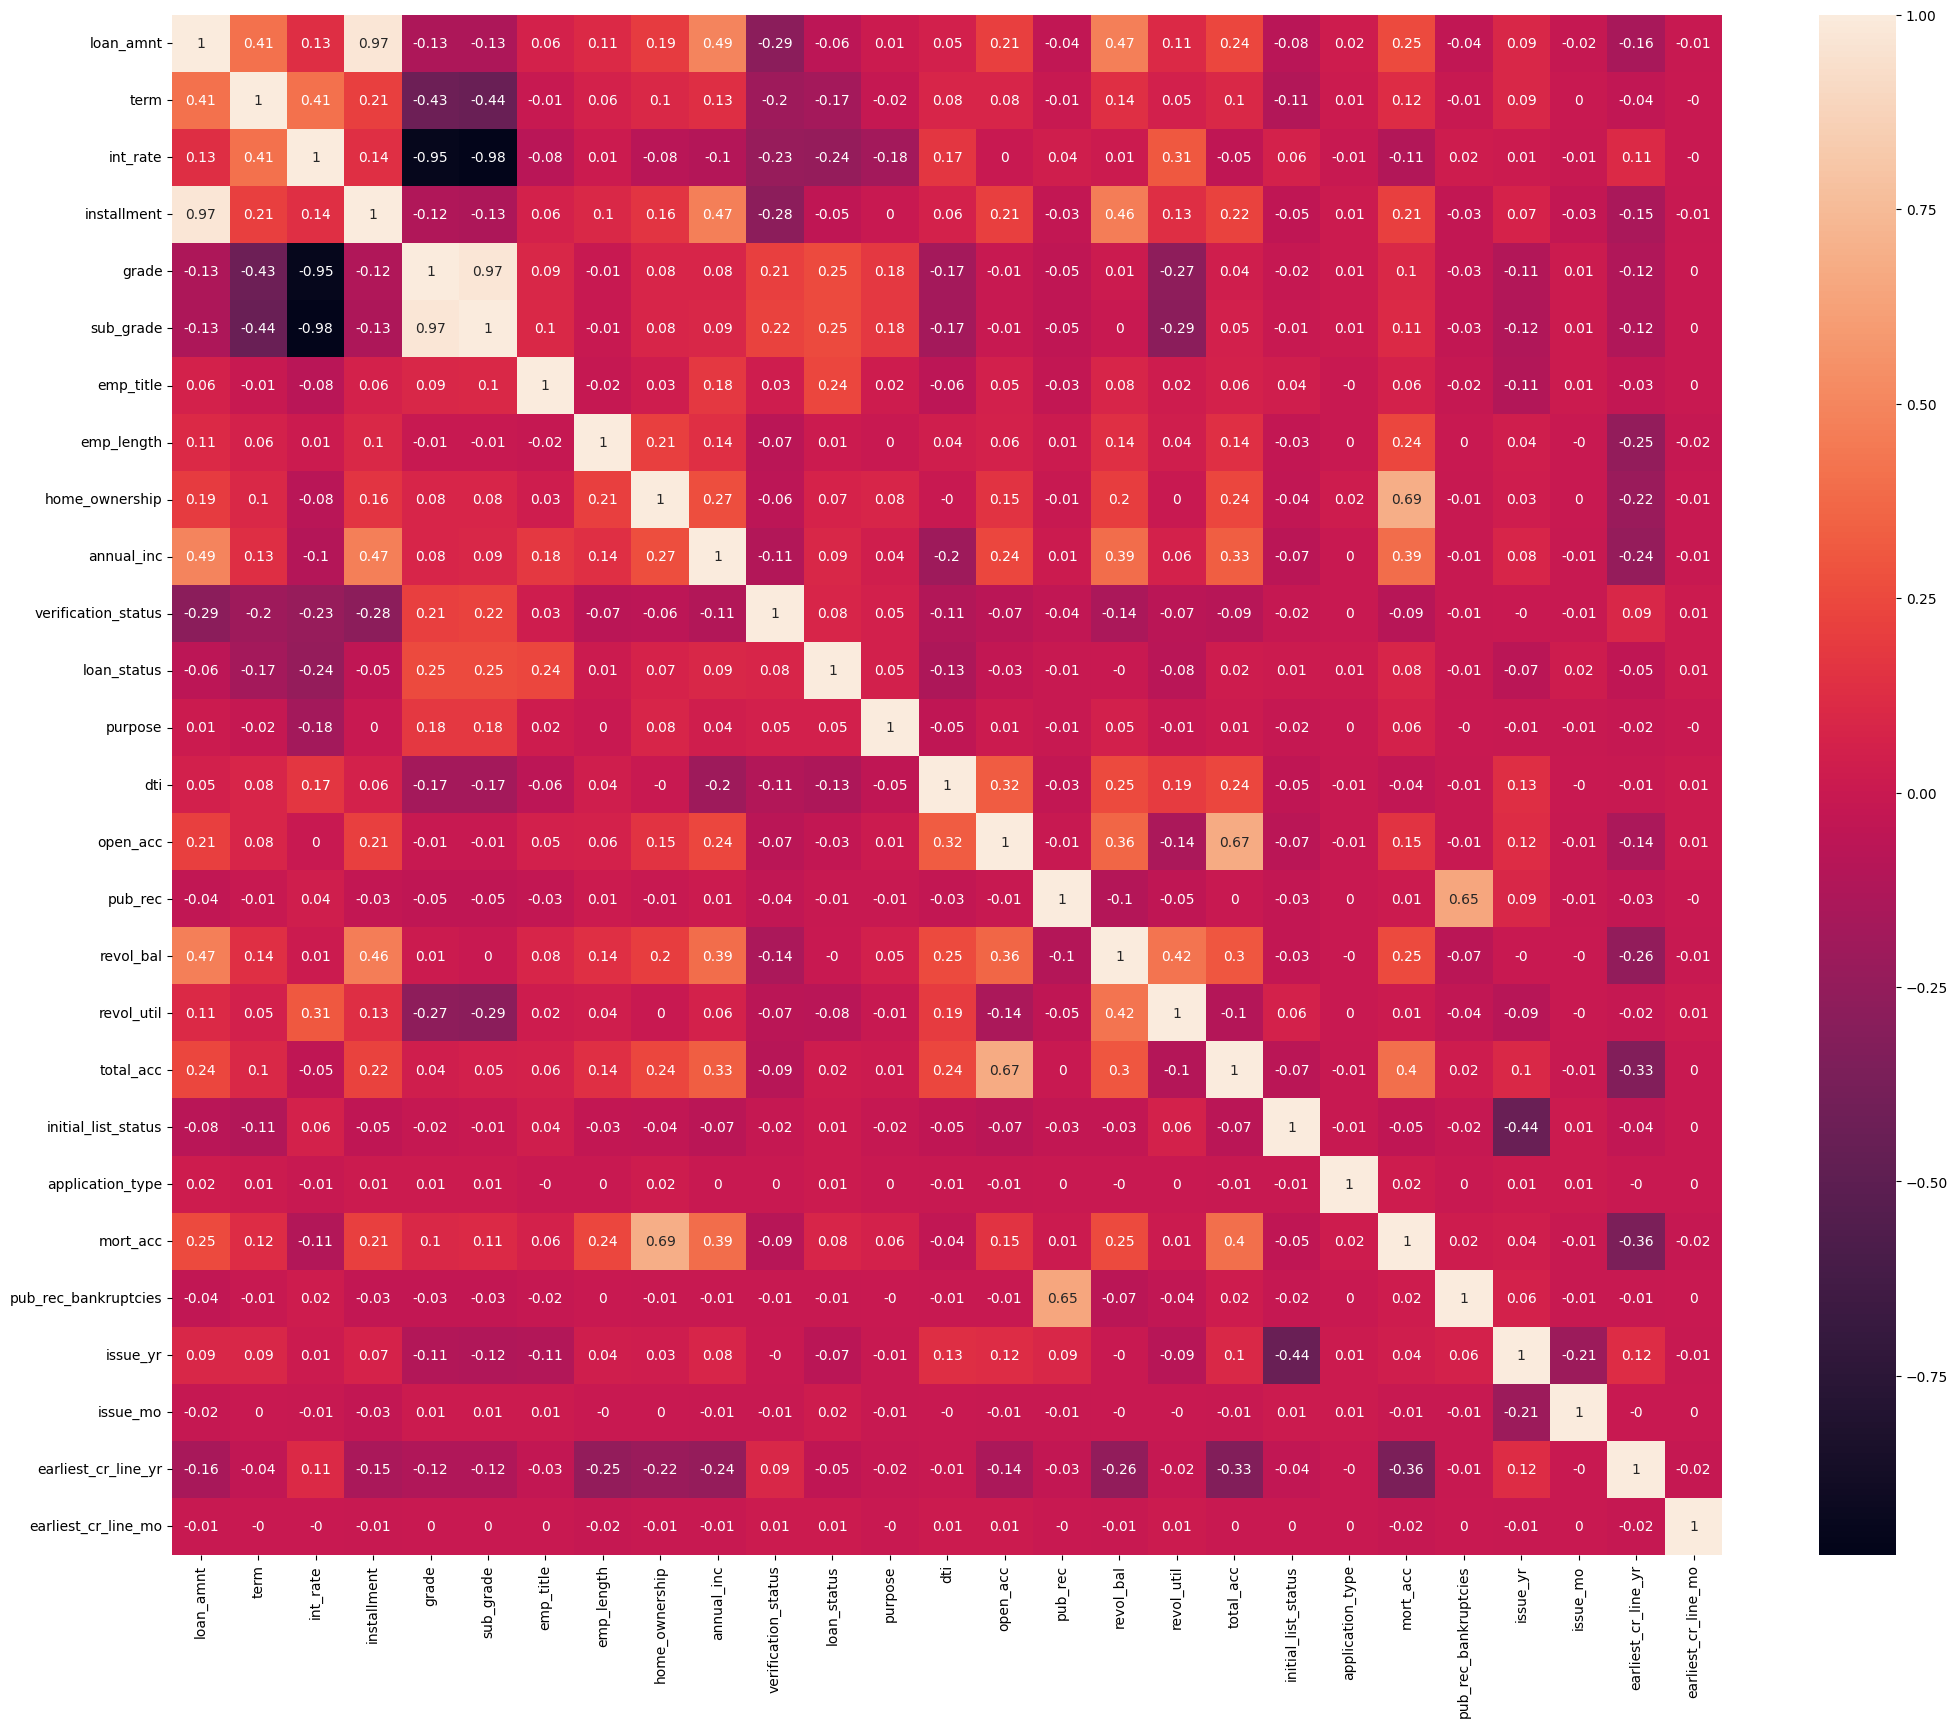

In [311]:
plt.figure(figsize=(25,20))
sns.heatmap(spearman_corr, annot=True)
plt.show()

#### Naming some of the highly corretion independent features

- int_rate has high negative correlation with grade and subgrade
- grade has high positive correlation with subgrade
- mort_acc has high positive correlation with pub_rec_bankruptcies
- pub_rec has high positive correlation with pub_rec_bankruptcies and mort_acc
- total_acc and open_acc has high positive correlation among each other
- installment and loan_amnt has high positive correlation among each other

In [312]:
train['emp_length'].unique()

array([10.,  2.,  1.,  8.,  7., nan,  5.,  4.,  3.,  9.,  0.,  6.])

In [313]:
# Lets drop some columns which has high correlation with each other.
for data_sets in [train, test, validation]:
    data_sets.drop('int_rate', axis=1, inplace=True) 
    data_sets.drop('sub_grade', axis=1, inplace=True) 
    data_sets.drop('mort_acc', axis=1, inplace=True) 
    data_sets.drop('pub_rec', axis=1, inplace=True)
    data_sets.drop('total_acc', axis=1, inplace=True)
    data_sets.drop('installment', axis=1, inplace=True)

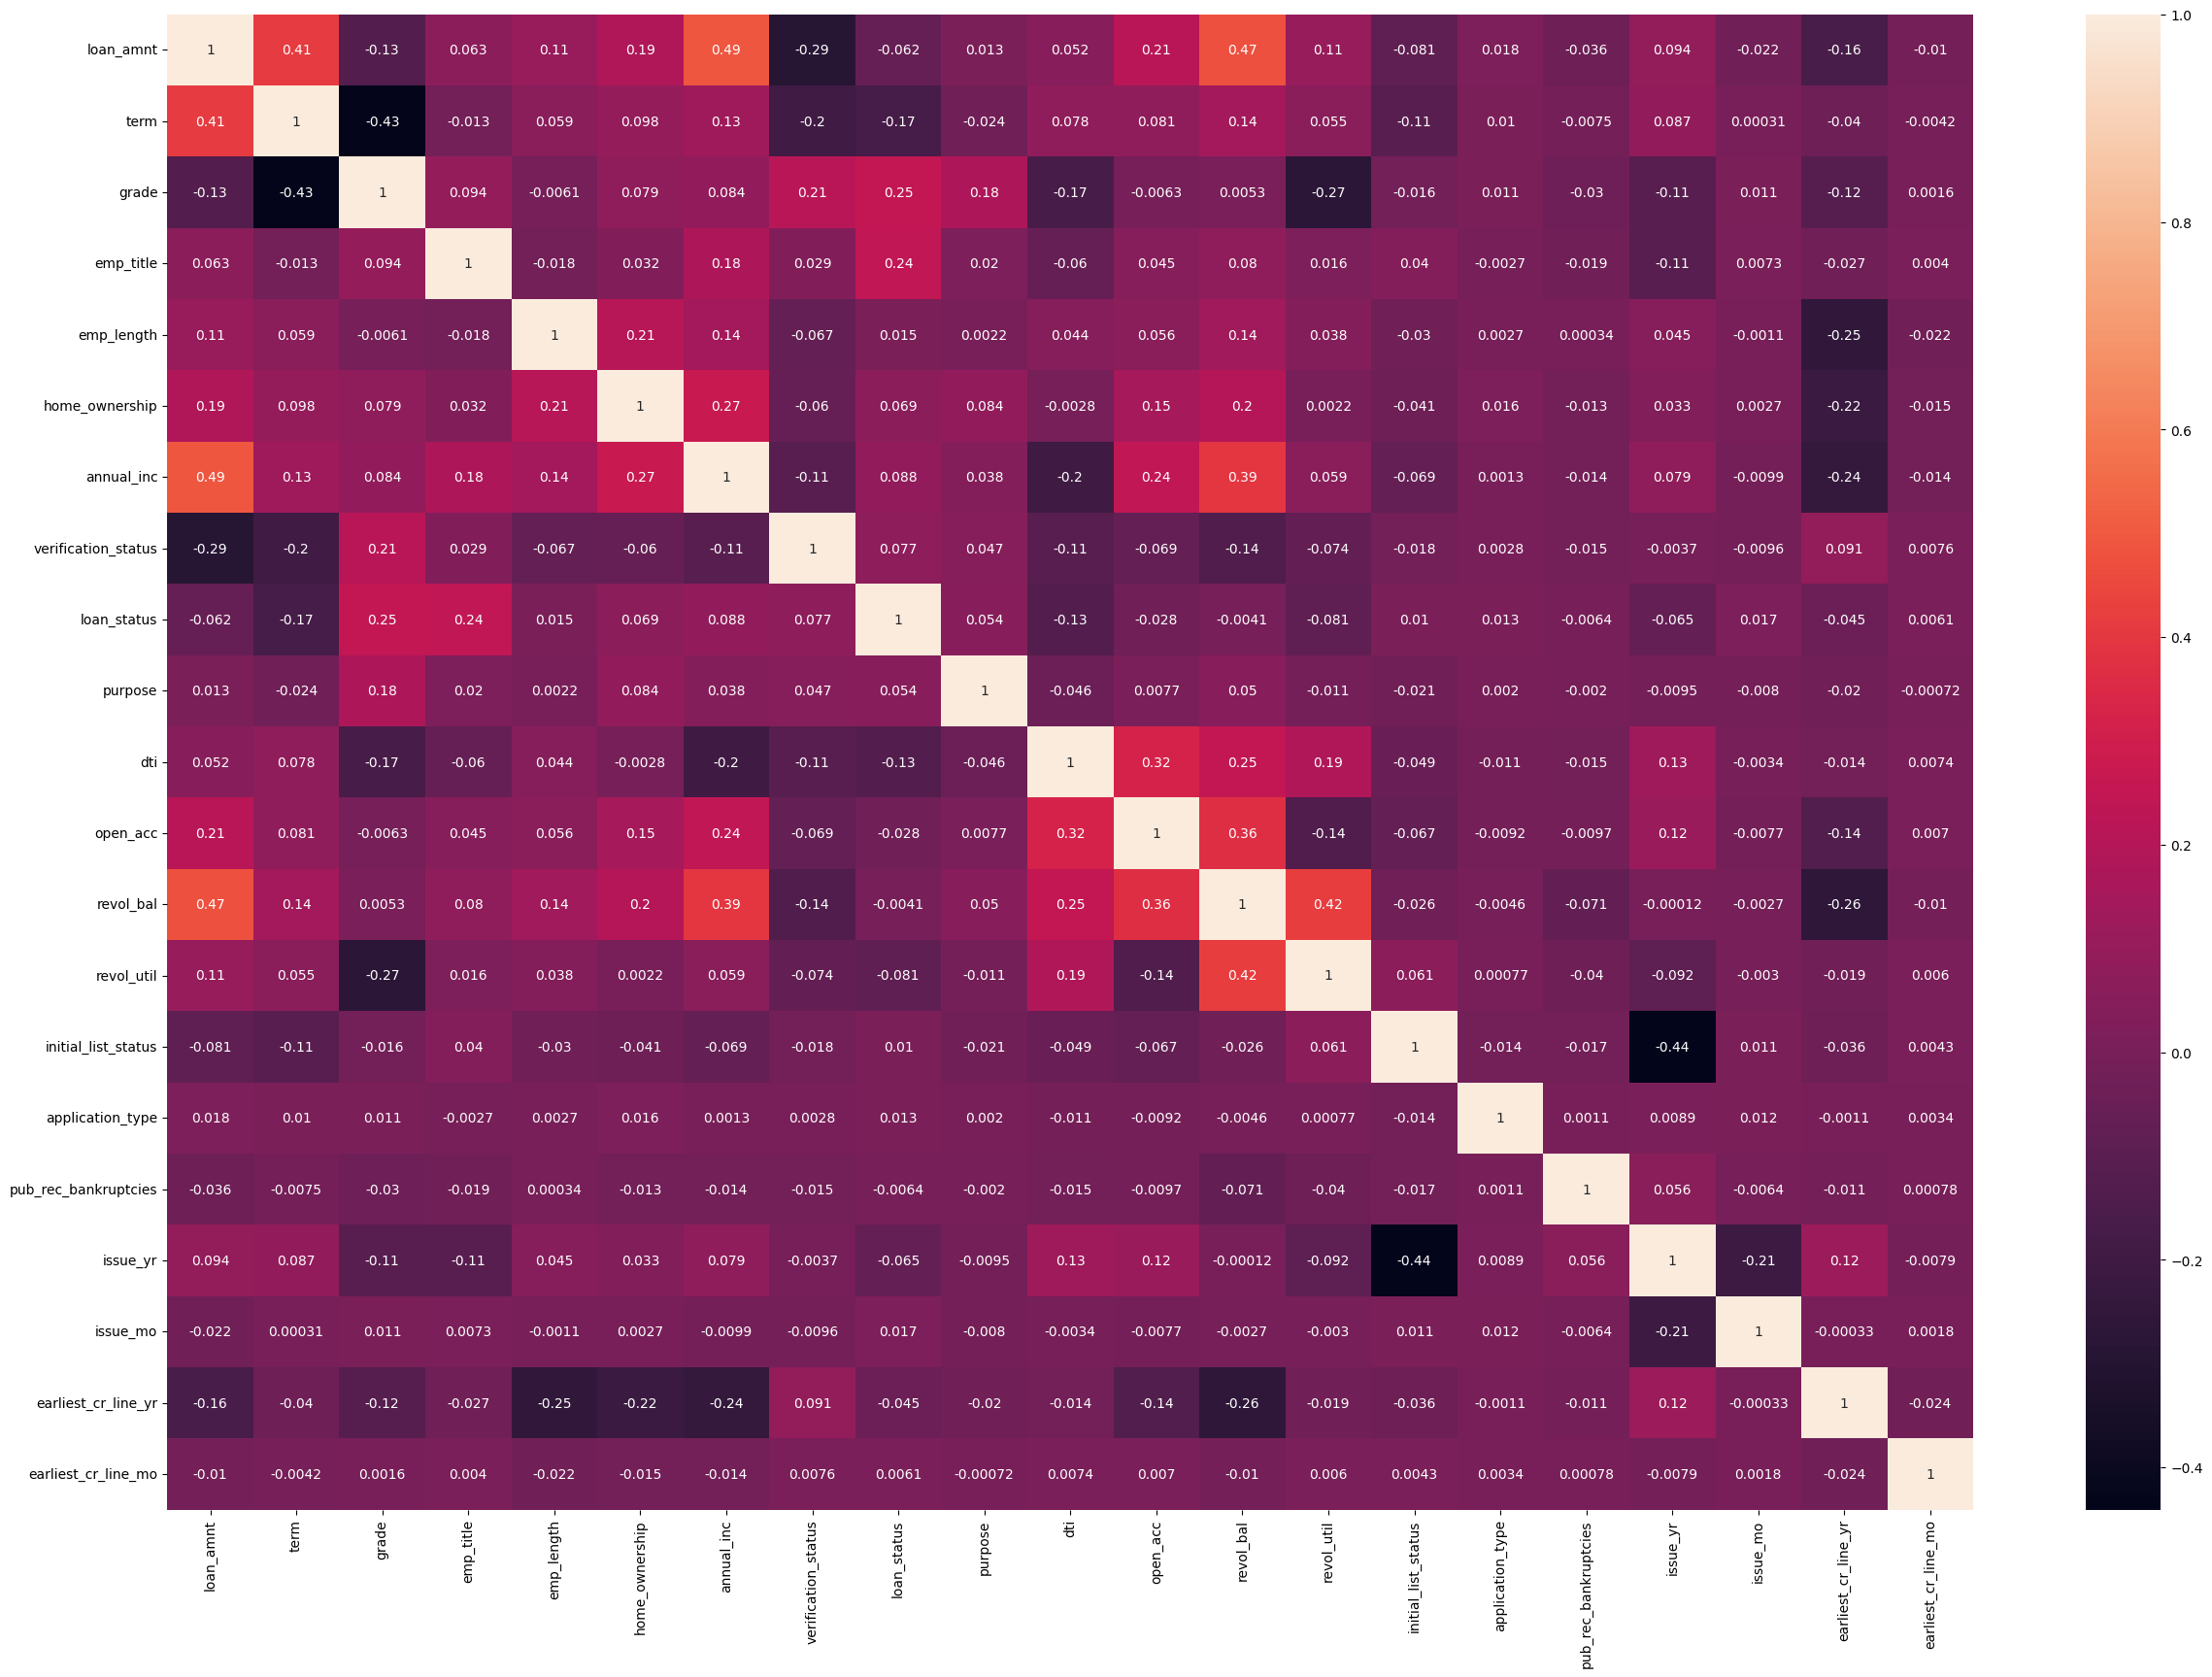

In [314]:
# We can see that, the coefficients do not go below -0.5 and above 0.5 
spearman_corr = train.corr(method='spearman')
plt.figure(figsize=(30,20))
sns.heatmap(spearman_corr, annot=True)
plt.show()

### Missing Value Treatment

In [315]:
train.isnull().sum()/train.shape[0]*100, test.isnull().sum()/test.shape[0]*100,

(loan_amnt                0.000000
 term                     0.000000
 grade                    0.000000
 emp_title                0.000000
 emp_length               4.641063
 home_ownership           0.000000
 annual_inc               0.000000
 verification_status      0.000000
 loan_status              0.000000
 purpose                  0.000000
 dti                      0.000000
 open_acc                 0.000000
 revol_bal                0.000000
 revol_util               0.071543
 initial_list_status      0.000000
 application_type         0.000000
 pub_rec_bankruptcies    10.956662
 issue_yr                 0.000000
 issue_mo                 0.000000
 earliest_cr_line_yr      0.000000
 earliest_cr_line_mo      0.000000
 dtype: float64,
 loan_amnt                0.000000
 term                     0.000000
 grade                    0.000000
 emp_title                0.000000
 emp_length               4.503447
 home_ownership           0.000000
 annual_inc               0.000000
 ve

In [316]:
#Missing values in revol_util are very less. Hence we can drop the null value rows
train.dropna(subset=['revol_util'], inplace = True)
test.dropna(subset=['revol_util'],inplace = True) 
validation.dropna(subset=['revol_util'],inplace = True) 

In [317]:
# Filling the rest with mode of that feature.
for data_sets in [train, test, validation]:
    data_sets['emp_length'].fillna(value = train['emp_length'].mode()[0], inplace = True)
    data_sets['pub_rec_bankruptcies'].fillna(value = train['pub_rec_bankruptcies'].mode()[0], inplace = True)

In [318]:
# No missing values found
train.isnull().sum()/train.shape[0]*100

loan_amnt               0.0
term                    0.0
grade                   0.0
emp_title               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
open_acc                0.0
revol_bal               0.0
revol_util              0.0
initial_list_status     0.0
application_type        0.0
pub_rec_bankruptcies    0.0
issue_yr                0.0
issue_mo                0.0
earliest_cr_line_yr     0.0
earliest_cr_line_mo     0.0
dtype: float64

### Outlier Treatment using IQR method

In [319]:
cont_features

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')

In [320]:
#Will be using IQR method to treat the outliers present in the continuos variables
cont_features = cont_features.delete([1,2,-1])

In [321]:
def IQR(col):
    Q3 = np.percentile(col, 75)
    Q1 = np.percentile(col, 25)
    iqr = Q3-Q1
    upper_lmt = Q3+1.5*iqr
    lower_lmt = Q1-1.5*iqr
    return lower_lmt, upper_lmt

In [322]:
for cont_var in cont_features:
    train = train[(train[cont_var]>=IQR(train[cont_var])[0])&(train[cont_var]<=IQR(train[cont_var])[1])]

### Duplicates treatment

In [323]:
# No duplicates found
train.duplicated().value_counts()

False    210616
dtype: int64

### Classification Modelling

In [324]:
# Creating predictor matrix and target vector. 
y_train = train['loan_status']
x_train = train.drop('loan_status', axis = 1)
y_test = test['loan_status']
x_test = test.drop('loan_status', axis = 1)
y_val = validation['loan_status']
x_val = validation.drop('loan_status', axis = 1)

In [325]:
# We can see that there is an imbalance of classes. Will be using weighted balancing method while model training
y_train.value_counts()

1    168869
0     41747
Name: loan_status, dtype: int64

#### Defining type1 and type 2 error before modelling
- 1 - Fully paid, 0 - Charged off
- type1 error (False postive) : Model has falsely predicted that an individual will fully the loan amount.
- type2 error (False negative) : Model has falsely predicted that an individual will be charged off. 
- Will be tuning my model based on precision score which controls false positives. Would not want to increase line of credit for non creditworthy individuals

#### Logistic Regression

In [326]:
from sklearn.metrics import precision_score, PrecisionRecallDisplay, RocCurveDisplay, recall_score, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [327]:
# Creating a pipeline which does scaling first and then trains a model. Will be using ridge regularisation to avoid overfitting.
# Hyperparameter C(1/λ) is decided based on the best score on validation data.

train_scores = []
val_scores = []
for lmda in np.arange(1, 300, 1): # range of values for Lambda
    #Creating a pipeline
    LR_pipeline = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2',  C=1/lmda, 
                                                                      class_weight={1:1, 0:(191038/46580)}))
    
    LR_pipeline.fit(x_train, y_train) #Training model
    
    train_pred = LR_pipeline.predict(x_train) #Predicting train values
    
    train_scores.append(precision_score(y_train, train_pred)) #Getting precision score for train data set.
    
    val_pred = LR_pipeline.predict(x_val) #Predicting validation values
    
    val_scores.append(precision_score(y_val, val_pred)) #Getting precision score for validation data set.

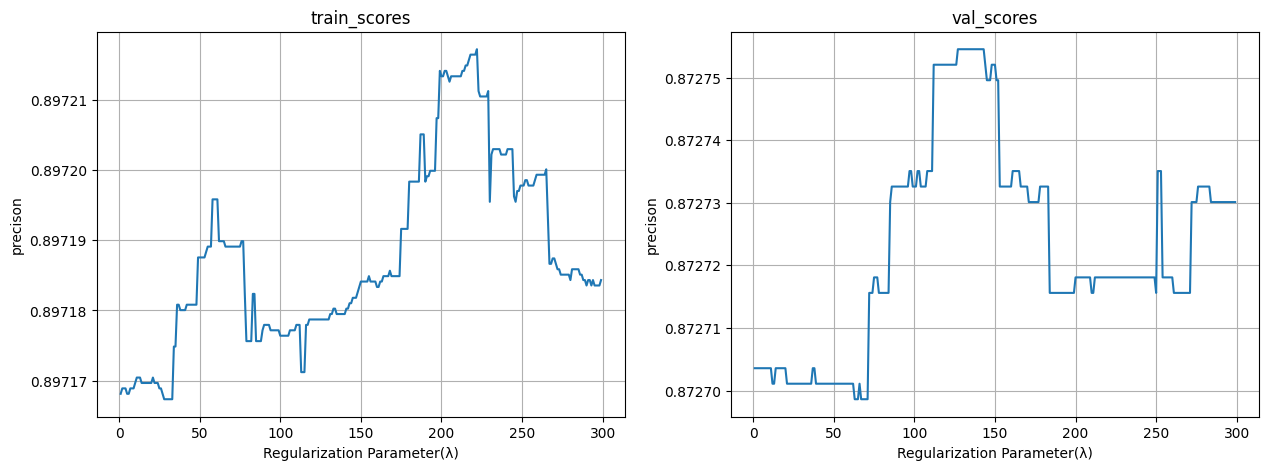

In [328]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.lineplot(x = np.arange(1, 300, 1), y = train_scores)
plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("precison")
plt.title("train_scores")
plt.grid()
plt.subplot(1,2,2)
sns.lineplot(x = np.arange(1,300, 1), y = val_scores)
plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("precison")
plt.title("val_scores")
plt.grid()
plt.show()

In [329]:
# The best value of lambda for the highest precision score came out to be 127 or c 1/127.
np.argmax(val_scores)+1, max(val_scores)

(127, 0.8727545201533641)

In [342]:
# Retraining with the best found parameters. 
best_LR_pipeline = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2',  C=1/127, 
                                                                     class_weight={1:1, 0:(191038/46580)}))
best_LR_pipeline.fit(x_train, y_train)
train_predictions = best_LR_pipeline.predict(x_train)
test_predictions = best_LR_pipeline.predict(x_test)
precision_score(y_train, train_predictions), precision_score(y_test, test_predictions)

(0.8971787069386529, 0.8698697921720063)

> 0.869 is our score on test data set using best_LR_pipeline model.

#### Random Forest

In [359]:
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import precision_score, PrecisionRecallDisplay, RocCurveDisplay, recall_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

param_grid = np.array(ParameterGrid({'n_estimators' : np.arange(10,100,10), 'max_depth' : np.arange(5, 30, 5)}))
precision_scores = []

for params in param_grid:
    RF_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(**params, random_state=42, n_jobs=-1, 
                                                                        class_weight={1:1, 0:(191038/46580)}))
    RF_pipeline.fit(x_train, y_train)
    val_pred = RF_pipeline.predict(x_val) #Predicting validation values
    precision_scores.append(precision_score(y_val, val_pred)) #Getting precision score for validation data set.                        

In [361]:
# At max_depth of 5 and n_estimators of 60, I got a precision score of 0.89.
max(precision_scores), param_grid[np.argmax(precision_scores)]

(0.8890448435827287, {'max_depth': 5, 'n_estimators': 60})

In [370]:
# Retraining with the best found parameters.
best_params = {'max_depth': 5, 'n_estimators': 60}
best_RF_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(**best_params, random_state=42, n_jobs=-1,
                                                                         class_weight={1:1, 0:(191038/46580)}))
best_RF_pipeline.fit(x_train, y_train)

train_predictions = best_RF_pipeline.predict(x_train)
test_predictions = best_RF_pipeline.predict(x_test)
precision_score(y_train, train_predictions), precision_score(y_test, test_predictions)

(0.9086698368726124, 0.8878805970149254)

> 0.887 is our score on test data set using best_RF_pipeline model.

#### Gradient Boosting (LGBM)

In [365]:
from lightgbm import LGBMClassifier
GB_params = {'max_depth':np.arange(2, 15, 2), 'n_estimators':np.arange(10,100,10), 'learning_rate':np.arange(0.05, 1, 0.05)}

param_grid = np.array(ParameterGrid(GB_params))
precision_scores = []

for params in param_grid:
    GB_pipeline = make_pipeline(StandardScaler(), LGBMClassifier(**params, random_state=42, n_jobs=-1, 
                                                                class_weight={1:1, 0:(191038/46580)}))
    GB_pipeline.fit(x_train, y_train)
    val_pred = GB_pipeline.predict(x_val) #Predicting validation values
    precision_scores.append(precision_score(y_val, val_pred)) #Getting precision score for validation data set.  

In [367]:
# At max_depth of 2 and n_estimators of 20, I got a precision score of 0.88.
max(precision_scores), param_grid[np.argmax(precision_scores)]

(0.8884149128343526,
 {'learning_rate': 0.45, 'max_depth': 2, 'n_estimators': 20})

In [369]:
# Retraining with the best found parameters.
best_params = {'learning_rate': 0.45, 'max_depth': 2, 'n_estimators': 20}
best_GB_pipeline = make_pipeline(StandardScaler(), LGBMClassifier(**params, random_state=42, n_jobs=-1, 
                                                                 class_weight={1:1, 0:(191038/46580)}))
best_GB_pipeline.fit(x_train, y_train)

train_predictions = best_GB_pipeline.predict(x_train)
test_predictions = best_GB_pipeline.predict(x_test)
precision_score(y_train, train_predictions), precision_score(y_test, test_predictions)

(0.9181453119163242, 0.875857715879706)

> 0.875 is our score on test data set using best_GB_pipeline model

> Overall best model was found out to be RF with a test score of 0.88.

#### Model complexity reduction using Feature Importances

In [373]:
fea_imp = pd.DataFrame(data={'features':x_train.columns, 'importance':best_RF_pipeline[1].feature_importances_})

In [374]:
# We have so many columns with negligible weightage. emp_title has an upper hand as compared to other columns.
fea_imp.sort_values(by='importance', inplace=True)
fea_imp

,features,importance
13,initial_list_status,0.000016
14,application_type,0.000016
15,pub_rec_bankruptcies,0.000020
19,earliest_cr_line_mo,0.000108
4,emp_length,0.000154
10,open_acc,0.000616
17,issue_mo,0.000954
11,revol_bal,0.001283
18,earliest_cr_line_yr,0.001571
8,purpose,0.003489


In [376]:
# Dropping features one by one in increasing order of their importances.
# Lesser the better
_train_scores = []
_val_scores = []

for i in range(1,len(ordered_features)):
    
    new_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(**{'max_depth': 5, 'n_estimators': 60},
                                                                          random_state=42, n_jobs=-1,
                                                                        class_weight={1:1, 0:(191038/46580)}))
    
    new_x_train = x_train.drop(fea_imp.features[:i], axis = 1)
    new_x_val = x_val.drop(fea_imp.features[:i], axis = 1)
    
    new_pipeline.fit(new_x_train, y_train)
    
    _train_scores.append(precision_score(y_train, new_pipeline.predict(new_x_train)))
    _val_scores.append(precision_score(y_val, new_pipeline.predict(new_x_val)))

<AxesSubplot: >

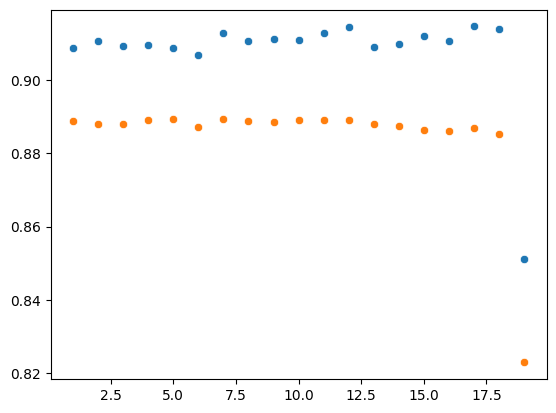

In [380]:
sns.scatterplot(x = np.arange(1,len(fea_imp.features),1),y = _train_scores)
sns.scatterplot(x = np.arange(1,len(fea_imp.features),1),y = _val_scores)

In [393]:
# We'll keep 0.88 as the threshold and remove all the features until our validation scores drops below 0.87.
# Just with the feature emp_title we can achieve a score of 0.82 on validation data set. 
#  Eventhough this is a very good score, i'll still go with term, grade and emp_title as per my domain knowledge. 
_val_scores[-3:], fea_imp.features.tail(3)

([0.8868252608235472, 0.8853788580440061, 0.8229587003052738],
 1         term
 2        grade
 3    emp_title
 Name: features, dtype: object)

In [394]:
# changing x_train and x_test again and training a new model with fewer features
x_train = x_train[['term', 'grade', 'emp_title']]
x_test = x_test[['term', 'grade', 'emp_title']]

simple_RF_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(**{'max_depth': 5, 'n_estimators': 60},
                                                                              random_state=42, n_jobs=-1,
                                                                            class_weight={1:1,0:(191038/46580)}))
simple_RF_pipeline .fit(x_train, y_train)
train_predictions = simple_RF_pipeline .predict(x_train)
test_predictions = simple_RF_pipeline .predict(x_test)
precision_score(y_train, train_predictions), precision_score(y_test, test_predictions), recall_score(y_test, test_predictions)

(0.9146027917239316, 0.8850563102873592, 0.5522729063263216)

##### simple_RF_pipeline is the optimised model with fewer features. Model with a test precision score of 0.88 is ready for deployment

#### ROC, PRC and Confusion matrix

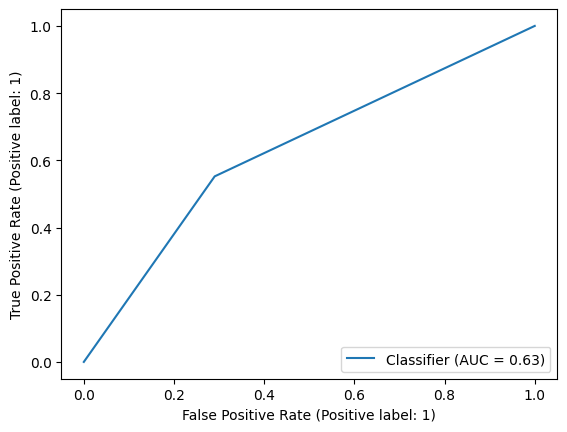

In [395]:
# Auc = 0.63 which is better than the random model(0.5 AUC), but not the best obviously. It might be because of 2 reasons. 

# 1. y_test data is highly imbalanced. Due to this AUC-ROC doesn't work.
# 2. We built our model only trying to decrease our false positives. But, TPR which is recall also includes false negatives
# which we did not take into our account. 

RocCurveDisplay.from_predictions(y_test, test_predictions)

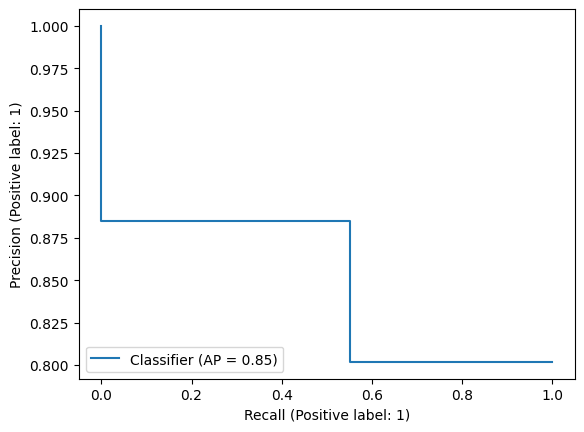

In [396]:
#PRC works even if there is an unbalance. AUC was found to be 0.85 across all the thresholds which is very good. 
PrecisionRecallDisplay.from_predictions(y_test, test_predictions)

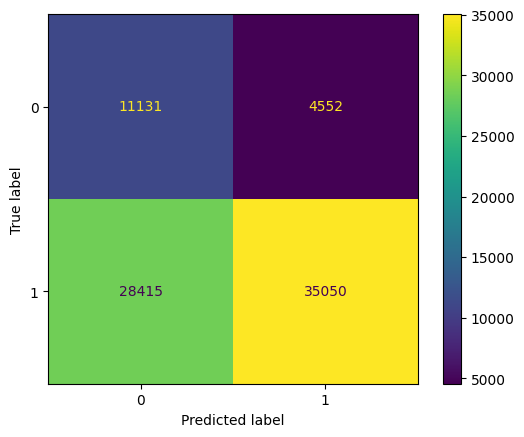

In [398]:
# We can see that our type2 error is very high as compared to type 1 error. 
# We might lose good customers, but will not be at a loss by giving loans to non credit worthy customers

ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)